# Data Tidy

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(8,6)}) # adjust figure size\

import re

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

## Table: course_schedule

In [2]:
#read the csv document
courseSchedule = pd.read_csv('DP- Course_Shedule_c 5.10.21.csv', encoding= 'unicode_escape')

In [3]:
courseSchedule.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5101 entries, 0 to 5100
Data columns (total 12 columns):
Student__c              5101 non-null object
Id                      5101 non-null object
CreatedDate             5101 non-null object
Course__c               5081 non-null object
Course_End_Time__c      2125 non-null object
Course_Start_Time__c    2127 non-null object
Course_Title__c         5087 non-null object
Course_Type__c          3066 non-null object
Credit_Hours__c         4308 non-null float64
Gen_Ed_Category__c      1214 non-null object
Semester_Quarter__c     4660 non-null object
Date_Course_Taken__c    4405 non-null object
dtypes: float64(1), object(11)
memory usage: 478.3+ KB


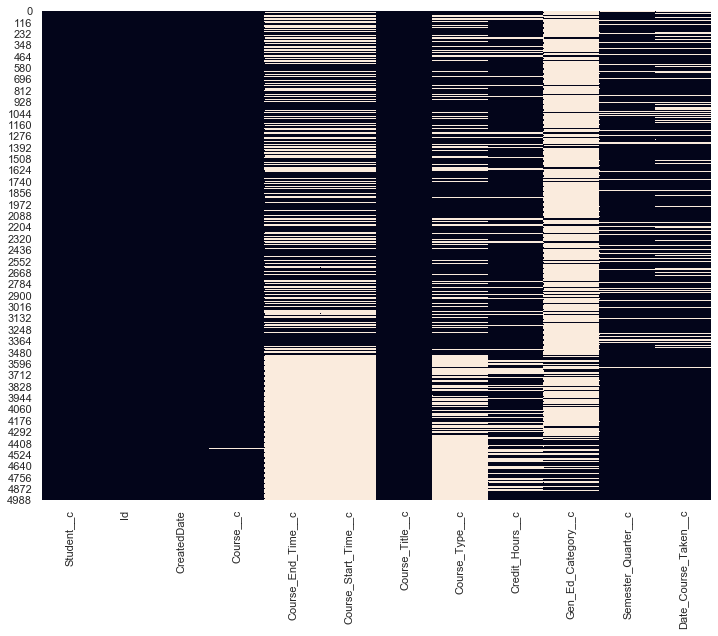

In [4]:
sns.set(rc={'figure.figsize':(12,9)}) # adjust figure size
sns.heatmap(courseSchedule.isnull(), cbar=False)

In [13]:
total = courseSchedule.isnull().sum().sort_values(ascending=False)
percent = (courseSchedule.isnull().sum()/courseSchedule.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total Missing', 'Percent'])
missing_data

,Total Missing,Percent
Gen_Ed_Category__c,3887,0.762007
Course_End_Time__c,2976,0.583415
Course_Start_Time__c,2974,0.583023
Course_Type__c,2035,0.398941
Credit_Hours__c,793,0.155460
Date_Course_Taken__c,696,0.136444
Semester_Quarter__c,441,0.086454
Course__c,20,0.003921
Course_Title__c,13,0.002549
CreatedDate,0,0.000000


### Course_Title__c

In [14]:
# select all entries that Course_Title__c is null
# we found all the courses are in FALL 20
# we found all the courses have a Course code
# so we will search for the course code to see if there are other records 
# which have the same course code but having course title
courseSchedule.loc[courseSchedule['Course_Title__c'].isna()]

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
4994,0034p00001f3nlDAAQ,a0G4p000005pz8FEAQ,12/2/2020 19:24,BC&J 100,NaN,NaN,NaN,NaN,3.0,Elective or Intro. Major Courses,FA 20,8/1/2020 0:00
4995,0034p00001f3nlDAAQ,a0G4p000005pz8GEAQ,12/2/2020 19:24,BC&J 101 Y,NaN,NaN,NaN,NaN,3.0,Elective or Intro. Major Courses,FA 20,8/1/2020 0:00
4996,0034p00001f3nlDAAQ,a0G4p000005pz8JEAQ,12/2/2020 19:24,ENG 180,NaN,NaN,NaN,NaN,3.0,English,FA 20,8/1/2020 0:00
4997,0034p00001f3nlDAAQ,a0G4p000005pz8HEAQ,12/2/2020 19:24,MATH 102,NaN,NaN,NaN,NaN,3.0,Math,FA 20,8/1/2020 0:00
4998,0034p00001f3nlDAAQ,a0G4p000005pz8IEAQ,12/2/2020 19:24,KIN 149,NaN,NaN,NaN,NaN,1.0,Science,FA 20,8/1/2020 0:00
5021,0034p00001f3nlNAAQ,a0G4p000005pz9cEAA,12/2/2020 19:24,UNIV 101,NaN,NaN,NaN,NaN,3.0,Elective or Intro. Major Courses,FA 20,8/1/2020 0:00
5022,0034p00001f3nlNAAQ,a0G4p000005pz9dEAA,12/2/2020 19:24,LTRE 190,NaN,NaN,NaN,NaN,3.0,English,FA 20,8/1/2020 0:00
5023,0034p00001f3nlNAAQ,a0G4p000005pz9bEAA,12/2/2020 19:24,MATH 109,NaN,NaN,NaN,NaN,3.0,Math,FA 20,8/1/2020 0:00
5041,0034p00001f3nlUAAQ,a0G4p000005pz9GEAQ,12/2/2020 19:24,LEJA 101,NaN,NaN,NaN,NaN,3.0,Elective or Intro. Major Courses,FA 20,8/1/2020 0:00
5042,0034p00001f3nlUAAQ,a0G4p000005pz9JEAQ,12/2/2020 19:24,POLS 122,NaN,NaN,NaN,NaN,3.0,Elective or Intro. Major Courses,FA 20,8/1/2020 0:00


#### FIN 101 --> Financial Health (DONE!)

In [15]:
# the first look, there is only one entry that course code = FIN 101
courseSchedule.loc[courseSchedule['Course__c'] == 'FIN 101']

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
4158,0034600001EXcTYAA1,a0G4p000005CNrbEAG,9/9/2019 18:41,FIN 101,NaN,NaN,Financial Health,Traditional,2.0,NaN,SP 19,1/1/2019 0:00
4993,0034p00001f3nlDAAQ,a0G4p000005pz8EEAQ,12/2/2020 19:24,FIN 101,NaN,NaN,Financial Health,NaN,2.0,Elective or Intro. Major Courses,FA 20,8/1/2020 0:00


In [16]:
# But there is actually another student who also took FIN 101. The course title is Financial Health
# we could not find it because there is a tab
courseSchedule.loc[courseSchedule['Student__c'] == '0034600001EXcTYAA1']

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
4158,0034600001EXcTYAA1,a0G4p000005CNrbEAG,9/9/2019 18:41,FIN 101,NaN,NaN,Financial Health,Traditional,2.0,NaN,SP 19,1/1/2019 0:00
4159,0034600001EXcTYAA1,a0G4p000005CNrcEAG,9/9/2019 18:41,MUS190,NaN,NaN,What to Listen for in Music,Traditional,3.0,NaN,SP 19,1/1/2019 0:00
4160,0034600001EXcTYAA1,a0G4p000005CNrdEAG,9/9/2019 18:41,PHYS150,NaN,NaN,Energy and the Environment,Traditional,4.0,NaN,SP 19,1/1/2019 0:00
4161,0034600001EXcTYAA1,a0G4p000005CNreEAG,9/9/2019 18:41,PSY 100,NaN,NaN,Introductory Psychology,Traditional,3.0,NaN,SP 19,1/1/2019 0:00
4162,0034600001EXcTYAA1,a0G4p000005CNrfEAG,9/9/2019 18:41,STAT171,NaN,NaN,General Elementary Statistics,Traditional,3.0,NaN,SP 19,1/1/2019 0:00


In [17]:
# therefore, what we did is
# 1) change FIN 101\t. to FIN 101
courseSchedule = courseSchedule.set_value(4158, 'Course__c', 'FIN 101')

In [18]:
# check the result
courseSchedule.loc[courseSchedule['Student__c'] == '0034600001EXcTYAA1']

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
4158,0034600001EXcTYAA1,a0G4p000005CNrbEAG,9/9/2019 18:41,FIN 101,NaN,NaN,Financial Health,Traditional,2.0,NaN,SP 19,1/1/2019 0:00
4159,0034600001EXcTYAA1,a0G4p000005CNrcEAG,9/9/2019 18:41,MUS190,NaN,NaN,What to Listen for in Music,Traditional,3.0,NaN,SP 19,1/1/2019 0:00
4160,0034600001EXcTYAA1,a0G4p000005CNrdEAG,9/9/2019 18:41,PHYS150,NaN,NaN,Energy and the Environment,Traditional,4.0,NaN,SP 19,1/1/2019 0:00
4161,0034600001EXcTYAA1,a0G4p000005CNreEAG,9/9/2019 18:41,PSY 100,NaN,NaN,Introductory Psychology,Traditional,3.0,NaN,SP 19,1/1/2019 0:00
4162,0034600001EXcTYAA1,a0G4p000005CNrfEAG,9/9/2019 18:41,STAT171,NaN,NaN,General Elementary Statistics,Traditional,3.0,NaN,SP 19,1/1/2019 0:00


In [19]:
# 2) fill in the NULL
courseSchedule['Course_Title__c'] = courseSchedule.apply(lambda row: 'Financial Health' 
                                                          if row['Course__c'] == 'FIN 101' 
                                                        else row['Course_Title__c'], axis = 1)

In [20]:
# check
courseSchedule[courseSchedule['Course__c'] == 'FIN 101']

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
4158,0034600001EXcTYAA1,a0G4p000005CNrbEAG,9/9/2019 18:41,FIN 101,NaN,NaN,Financial Health,Traditional,2.0,NaN,SP 19,1/1/2019 0:00
4993,0034p00001f3nlDAAQ,a0G4p000005pz8EEAQ,12/2/2020 19:24,FIN 101,NaN,NaN,Financial Health,NaN,2.0,Elective or Intro. Major Courses,FA 20,8/1/2020 0:00


#### BC&J 100 (FAILED)

In [21]:
# there is only one entry that course code = FIN 101
courseSchedule.loc[courseSchedule['Course__c'] == 'BC&J 100']

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
4994,0034p00001f3nlDAAQ,a0G4p000005pz8FEAQ,12/2/2020 19:24,BC&J 100,NaN,NaN,NaN,NaN,3.0,Elective or Intro. Major Courses,FA 20,8/1/2020 0:00


#### BC&J 101 Y (FAILED)

In [22]:
courseSchedule.loc[courseSchedule['Course__c'] == 'BC&J 101 Y']

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
4995,0034p00001f3nlDAAQ,a0G4p000005pz8GEAQ,12/2/2020 19:24,BC&J 101 Y,NaN,NaN,NaN,NaN,3.0,Elective or Intro. Major Courses,FA 20,8/1/2020 0:00


#### ENG 180 (FAILED)

In [23]:
# ENG 180 represent two courses: college reading and college writing
# we did not find any patterns (say one offered in fall and the other offered in spring)
# actually these two courses can be offered in same semester and share the course code
# we failed to fill in the Null
# but we noticed index(3680). COLLEGE WRIT I should be written as College Writing I --> fixed it
courseSchedule.loc[courseSchedule['Course__c'] == 'ENG 180']

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
2457,0034600000iXkmoAAC,a0G46000002eBMaEAM,1/6/2018 0:47,ENG 180,12:50PM,12:00PM,College Reading,Traditional,3.0,NaN,NaN,NaN
2679,0034600000iXkmyAAC,a0G46000002eBXxEAM,1/6/2018 0:47,ENG 180,12:45PM,11:30AM,College Reading,Traditional,3.0,NaN,FA17,8/1/2017 0:00
2762,0034600000iXkn2AAC,a0G46000002eBYBEA2,1/6/2018 0:47,ENG 180,10:45AM,9:30AM,College Writing I,Traditional,3.0,NaN,FA17,8/1/2017 0:00
3467,0034600000lBxVZAA0,a0G46000002eBViEAM,1/6/2018 0:47,ENG 180,12:50PM,12:00PM,College Reading,Traditional,3.0,NaN,Fall,NaN
3680,0034600001a2tEfAAI,a0G4p000005JenzEAC,7/20/2020 3:09,ENG 180,NaN,NaN,COLLEGE WRIT I,NaN,NaN,English,FA 19,8/1/2019 0:00
3682,0034600001a2tEfAAI,a0G4p000005Pxv0EAC,1/31/2020 17:01,ENG 180,NaN,NaN,College Writing I,NaN,3.0,English,FA 19,8/1/2019 0:00
4849,0034600001YKVyHAAX,a0G4p000005PxpoEAC,1/31/2020 17:01,ENG 180,NaN,NaN,College Writing I,NaN,3.0,English,FA 19,8/1/2019 0:00
4854,0034600001YKVyHAAX,a0G4p000005pu56EAA,11/24/2020 21:16,ENG 180,NaN,NaN,College Writing I,NaN,NaN,NaN,SP 20,1/1/2020 0:00
4996,0034p00001f3nlDAAQ,a0G4p000005pz8JEAQ,12/2/2020 19:24,ENG 180,NaN,NaN,NaN,NaN,3.0,English,FA 20,8/1/2020 0:00


In [24]:
# COLLEGE WRIT I -->  College Writing I
courseSchedule = courseSchedule.set_value(3680, 'Course_Title__c', 'College Writing I')

In [25]:
# check
courseSchedule[courseSchedule['Course__c'] == 'ENG 180']

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
2457,0034600000iXkmoAAC,a0G46000002eBMaEAM,1/6/2018 0:47,ENG 180,12:50PM,12:00PM,College Reading,Traditional,3.0,NaN,NaN,NaN
2679,0034600000iXkmyAAC,a0G46000002eBXxEAM,1/6/2018 0:47,ENG 180,12:45PM,11:30AM,College Reading,Traditional,3.0,NaN,FA17,8/1/2017 0:00
2762,0034600000iXkn2AAC,a0G46000002eBYBEA2,1/6/2018 0:47,ENG 180,10:45AM,9:30AM,College Writing I,Traditional,3.0,NaN,FA17,8/1/2017 0:00
3467,0034600000lBxVZAA0,a0G46000002eBViEAM,1/6/2018 0:47,ENG 180,12:50PM,12:00PM,College Reading,Traditional,3.0,NaN,Fall,NaN
3680,0034600001a2tEfAAI,a0G4p000005JenzEAC,7/20/2020 3:09,ENG 180,NaN,NaN,College Writing I,NaN,NaN,English,FA 19,8/1/2019 0:00
3682,0034600001a2tEfAAI,a0G4p000005Pxv0EAC,1/31/2020 17:01,ENG 180,NaN,NaN,College Writing I,NaN,3.0,English,FA 19,8/1/2019 0:00
4849,0034600001YKVyHAAX,a0G4p000005PxpoEAC,1/31/2020 17:01,ENG 180,NaN,NaN,College Writing I,NaN,3.0,English,FA 19,8/1/2019 0:00
4854,0034600001YKVyHAAX,a0G4p000005pu56EAA,11/24/2020 21:16,ENG 180,NaN,NaN,College Writing I,NaN,NaN,NaN,SP 20,1/1/2020 0:00
4996,0034p00001f3nlDAAQ,a0G4p000005pz8JEAQ,12/2/2020 19:24,ENG 180,NaN,NaN,NaN,NaN,3.0,English,FA 20,8/1/2020 0:00


#### MATH 102 --> Intermediate Algebra (DONE!)

In [26]:
courseSchedule.loc[courseSchedule['Course__c'] == 'MATH 102']

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
2640,0034600000iXkmVAAS,a0G46000002eBISEA2,1/6/2018 0:47,MATH 102,3:05PM,2:15PM,Intermediate Algebra,Traditional,3.0,NaN,Fall,NaN
4997,0034p00001f3nlDAAQ,a0G4p000005pz8HEAQ,12/2/2020 19:24,MATH 102,NaN,NaN,NaN,NaN,3.0,Math,FA 20,8/1/2020 0:00


In [27]:
#fill in the NULL
courseSchedule['Course_Title__c'] = courseSchedule.apply(lambda row: 'Intermediate Algebra' 
                                                          if row['Course__c'] == 'MATH 102' 
                                                        else row['Course_Title__c'], axis = 1)

In [28]:
# check
courseSchedule.loc[courseSchedule['Course__c'] == 'MATH 102']

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
2640,0034600000iXkmVAAS,a0G46000002eBISEA2,1/6/2018 0:47,MATH 102,3:05PM,2:15PM,Intermediate Algebra,Traditional,3.0,NaN,Fall,NaN
4997,0034p00001f3nlDAAQ,a0G4p000005pz8HEAQ,12/2/2020 19:24,MATH 102,NaN,NaN,Intermediate Algebra,NaN,3.0,Math,FA 20,8/1/2020 0:00


#### KIN 149 (FAILED)

In [29]:
courseSchedule.loc[courseSchedule['Course__c'] == 'KIN 149']

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
4998,0034p00001f3nlDAAQ,a0G4p000005pz8IEAQ,12/2/2020 19:24,KIN 149,NaN,NaN,NaN,NaN,1.0,Science,FA 20,8/1/2020 0:00


#### UNIV 101 --> University Experience (DONE!)

In [30]:
courseSchedule.loc[courseSchedule['Course__c'] == 'UNIV 101']

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
1704,0034600000iXklfAAC,a0G46000002eBX7EAM,1/6/2018 0:47,UNIV 101,3:50PM,3:00PM,University Experience,Traditional,1.0,NaN,FA17,8/1/2017 0:00
2651,0034600000iXkmWAAS,a0G46000002eBIrEAM,1/6/2018 0:47,UNIV 101,12:50PM,12:00PM,University Experience,Traditional,1.0,NaN,FA17,8/1/2017 0:00
3421,0034600000lBxVAAA0,a0G46000002eBVlEAM,1/6/2018 0:47,UNIV 101,2:50PM,2:00PM,University Experience,Traditional,1.0,NaN,Fall,NaN
3564,0034600001a2qkFAAQ,a0G4p000005PxukEAC,1/31/2020 17:01,UNIV 101,NaN,NaN,University Experience,NaN,1.0,Elective or Intro. Major Courses,FA 19,8/1/2019 0:00
4917,0034p00001f3nkeAAA,a0G4p000005pz6mEAA,12/2/2020 19:24,UNIV 101,NaN,NaN,University Expereince,NaN,1.0,Elective or Intro. Major Courses,FA 20,8/1/2020 0:00
4972,0034p00001f3nl0AAA,a0G4p000005pz6xEAA,12/2/2020 19:24,UNIV 101,NaN,NaN,University Experience,NaN,1.0,Elective or Intro. Major Courses,FA 20,8/1/2020 0:00
4991,0034p00001f3nlCAAQ,a0G4p000005pz8PEAQ,12/2/2020 19:24,UNIV 101,NaN,NaN,University Experience,NaN,1.0,Elective or Intro. Major Courses,FA 20,8/1/2020 0:00
5021,0034p00001f3nlNAAQ,a0G4p000005pz9cEAA,12/2/2020 19:24,UNIV 101,NaN,NaN,NaN,NaN,3.0,Elective or Intro. Major Courses,FA 20,8/1/2020 0:00


In [31]:
#fill in the NULL
courseSchedule['Course_Title__c'] = courseSchedule.apply(lambda row: 'University Experience' 
                                                          if row['Course__c'] == 'UNIV 101' 
                                                        else row['Course_Title__c'], axis = 1)

In [32]:
courseSchedule.loc[courseSchedule['Course__c'] == 'UNIV 101']

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
1704,0034600000iXklfAAC,a0G46000002eBX7EAM,1/6/2018 0:47,UNIV 101,3:50PM,3:00PM,University Experience,Traditional,1.0,NaN,FA17,8/1/2017 0:00
2651,0034600000iXkmWAAS,a0G46000002eBIrEAM,1/6/2018 0:47,UNIV 101,12:50PM,12:00PM,University Experience,Traditional,1.0,NaN,FA17,8/1/2017 0:00
3421,0034600000lBxVAAA0,a0G46000002eBVlEAM,1/6/2018 0:47,UNIV 101,2:50PM,2:00PM,University Experience,Traditional,1.0,NaN,Fall,NaN
3564,0034600001a2qkFAAQ,a0G4p000005PxukEAC,1/31/2020 17:01,UNIV 101,NaN,NaN,University Experience,NaN,1.0,Elective or Intro. Major Courses,FA 19,8/1/2019 0:00
4917,0034p00001f3nkeAAA,a0G4p000005pz6mEAA,12/2/2020 19:24,UNIV 101,NaN,NaN,University Experience,NaN,1.0,Elective or Intro. Major Courses,FA 20,8/1/2020 0:00
4972,0034p00001f3nl0AAA,a0G4p000005pz6xEAA,12/2/2020 19:24,UNIV 101,NaN,NaN,University Experience,NaN,1.0,Elective or Intro. Major Courses,FA 20,8/1/2020 0:00
4991,0034p00001f3nlCAAQ,a0G4p000005pz8PEAQ,12/2/2020 19:24,UNIV 101,NaN,NaN,University Experience,NaN,1.0,Elective or Intro. Major Courses,FA 20,8/1/2020 0:00
5021,0034p00001f3nlNAAQ,a0G4p000005pz9cEAA,12/2/2020 19:24,UNIV 101,NaN,NaN,University Experience,NaN,3.0,Elective or Intro. Major Courses,FA 20,8/1/2020 0:00


#### LTRE 190 --> Coll Reading Study Strategies (DONE!)

In [33]:
courseSchedule.loc[courseSchedule['Course__c'] == 'LTRE 190']

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
850,00346000002iXenAAE,a0G46000003rjrOEAQ,8/27/2018 22:04,LTRE 190,3:15PM,2:00PM,Coll Reading Study Strategies,Traditional,3.0,NaN,SP 18,1/1/2018 0:00
1708,0034600000iXklfAAC,a0G46000003rjgVEAQ,8/27/2018 22:04,LTRE 190,12:25PM,10:50AM,Coll Reading Study Strategies,Traditional,3.0,NaN,SP 18,1/1/2018 0:00
2655,0034600000iXkmWAAS,a0G46000003rjjOEAQ,8/27/2018 22:04,LTRE 190,1:45PM,12:30PM,Coll Reading Study Strategies,Traditional,3.0,NaN,SP 18,1/1/2018 0:00
3412,0034600000lBxVAAA0,a0G46000003rjwREAQ,8/27/2018 22:04,LTRE 190,3:15PM,2:00PM,Coll Reading Study Strategies,Traditional,3.0,NaN,SP 18,1/1/2018 0:00
4055,0034600001EXcTOAA1,a0G4p000005CNnXEAW,9/9/2019 18:41,LTRE 190,NaN,NaN,Coll Reading Study Strategies,Traditional,3.0,NaN,SP 19,1/1/2019 0:00
4093,0034600001EXcTTAA1,a0G4p000005CNgiEAG,9/9/2019 18:41,LTRE 190,NaN,NaN,Coll Reading Study Strategies,Traditional,3.0,NaN,SP 19,1/1/2019 0:00
4334,0034600001EXcUYAA1,a0G4p000005CNp1EAG,9/9/2019 18:41,LTRE 190,NaN,NaN,Coll Reading Study Strategies,Traditional,3.0,NaN,SP 19,1/1/2019 0:00
4989,0034p00001f3nlCAAQ,a0G4p000005pz8MEAQ,12/2/2020 19:24,LTRE 190,NaN,NaN,Coll Reading Study Strategies,NaN,3.0,Elective or Intro. Major Courses,FA 20,8/1/2020 0:00
5022,0034p00001f3nlNAAQ,a0G4p000005pz9dEAA,12/2/2020 19:24,LTRE 190,NaN,NaN,NaN,NaN,3.0,English,FA 20,8/1/2020 0:00


In [34]:
#fill in the NULL
courseSchedule['Course_Title__c'] = courseSchedule.apply(lambda row: 'Coll Reading Study Strategies' 
                                                          if row['Course__c'] == 'LTRE 190' 
                                                        else row['Course_Title__c'], axis = 1)

In [35]:
courseSchedule.loc[courseSchedule['Course__c'] == 'LTRE 190']

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
850,00346000002iXenAAE,a0G46000003rjrOEAQ,8/27/2018 22:04,LTRE 190,3:15PM,2:00PM,Coll Reading Study Strategies,Traditional,3.0,NaN,SP 18,1/1/2018 0:00
1708,0034600000iXklfAAC,a0G46000003rjgVEAQ,8/27/2018 22:04,LTRE 190,12:25PM,10:50AM,Coll Reading Study Strategies,Traditional,3.0,NaN,SP 18,1/1/2018 0:00
2655,0034600000iXkmWAAS,a0G46000003rjjOEAQ,8/27/2018 22:04,LTRE 190,1:45PM,12:30PM,Coll Reading Study Strategies,Traditional,3.0,NaN,SP 18,1/1/2018 0:00
3412,0034600000lBxVAAA0,a0G46000003rjwREAQ,8/27/2018 22:04,LTRE 190,3:15PM,2:00PM,Coll Reading Study Strategies,Traditional,3.0,NaN,SP 18,1/1/2018 0:00
4055,0034600001EXcTOAA1,a0G4p000005CNnXEAW,9/9/2019 18:41,LTRE 190,NaN,NaN,Coll Reading Study Strategies,Traditional,3.0,NaN,SP 19,1/1/2019 0:00
4093,0034600001EXcTTAA1,a0G4p000005CNgiEAG,9/9/2019 18:41,LTRE 190,NaN,NaN,Coll Reading Study Strategies,Traditional,3.0,NaN,SP 19,1/1/2019 0:00
4334,0034600001EXcUYAA1,a0G4p000005CNp1EAG,9/9/2019 18:41,LTRE 190,NaN,NaN,Coll Reading Study Strategies,Traditional,3.0,NaN,SP 19,1/1/2019 0:00
4989,0034p00001f3nlCAAQ,a0G4p000005pz8MEAQ,12/2/2020 19:24,LTRE 190,NaN,NaN,Coll Reading Study Strategies,NaN,3.0,Elective or Intro. Major Courses,FA 20,8/1/2020 0:00
5022,0034p00001f3nlNAAQ,a0G4p000005pz9dEAA,12/2/2020 19:24,LTRE 190,NaN,NaN,Coll Reading Study Strategies,NaN,3.0,English,FA 20,8/1/2020 0:00


#### MATH 109 --> Fund Math II (DONE!)

In [36]:
# we also found two course titles should be re-written to keep the pattern same
# I checked the school these students enrolled, except for (0034600000lBxVAAA0), CCC- Malcolm X
# others are all enrolled inNorthern Illinois University
courseSchedule.loc[courseSchedule['Course__c'] == 'MATH 109']

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
1709,0034600000iXklfAAC,a0G46000003rjgYEAQ,8/27/2018 22:04,MATH 109,3:00PM,1:50PM,Fund Math II,Traditional,3.0,NaN,SP 18,1/1/2018 0:00
2653,0034600000iXkmWAAS,a0G46000002eBIqEAM,1/6/2018 0:47,MATH 109,9:50AM,9:00AM,Fundamental Math II,Traditional,3.0,NaN,FA17,8/1/2017 0:00
3409,0034600000lBxVAAA0,a0G46000003rjwNEAQ,8/27/2018 22:04,MATH 109,1:50PM,1:00PM,Fund Math II,Traditional,3.0,NaN,SP 18,1/1/2018 0:00
4056,0034600001EXcTOAA1,a0G4p000005CNnYEAW,9/9/2019 18:41,MATH 109,NaN,NaN,Fund Math II,Traditional,3.0,NaN,SP 19,1/1/2019 0:00
4975,0034p00001f3nl0AAA,a0G4p000005pz6vEAA,12/2/2020 19:24,MATH 109,NaN,NaN,Fund Math II,NaN,3.0,Math,FA 20,8/1/2020 0:00
4992,0034p00001f3nlCAAQ,a0G4p000005pz8NEAQ,12/2/2020 19:24,MATH 109,NaN,NaN,Fund Math II,NaN,3.0,Math,FA 20,8/1/2020 0:00
5008,0034p00001f3nlIAAQ,a0G4p000005pz9uEAA,12/2/2020 19:24,MATH 109,NaN,NaN,Fund of Math II,NaN,3.0,Math,FA 20,8/1/2020 0:00
5023,0034p00001f3nlNAAQ,a0G4p000005pz9bEAA,12/2/2020 19:24,MATH 109,NaN,NaN,NaN,NaN,3.0,Math,FA 20,8/1/2020 0:00


In [37]:
# Fundamental Math II -->  Fund Math II
courseSchedule = courseSchedule.set_value(2653, 'Course_Title__c', 'Fund Math II')

# Fund of Math II -->  Fund Math II
courseSchedule = courseSchedule.set_value(5008, 'Course_Title__c', 'Fund Math II')

In [38]:
#fill in the NULL
courseSchedule['Course_Title__c'] = courseSchedule.apply(lambda row: 'Fund Math II' 
                                                          if row['Course__c'] == 'MATH 109' 
                                                        else row['Course_Title__c'], axis = 1)

In [39]:
# check
courseSchedule.loc[courseSchedule['Course__c'] == 'MATH 109']

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
1709,0034600000iXklfAAC,a0G46000003rjgYEAQ,8/27/2018 22:04,MATH 109,3:00PM,1:50PM,Fund Math II,Traditional,3.0,NaN,SP 18,1/1/2018 0:00
2653,0034600000iXkmWAAS,a0G46000002eBIqEAM,1/6/2018 0:47,MATH 109,9:50AM,9:00AM,Fund Math II,Traditional,3.0,NaN,FA17,8/1/2017 0:00
3409,0034600000lBxVAAA0,a0G46000003rjwNEAQ,8/27/2018 22:04,MATH 109,1:50PM,1:00PM,Fund Math II,Traditional,3.0,NaN,SP 18,1/1/2018 0:00
4056,0034600001EXcTOAA1,a0G4p000005CNnYEAW,9/9/2019 18:41,MATH 109,NaN,NaN,Fund Math II,Traditional,3.0,NaN,SP 19,1/1/2019 0:00
4975,0034p00001f3nl0AAA,a0G4p000005pz6vEAA,12/2/2020 19:24,MATH 109,NaN,NaN,Fund Math II,NaN,3.0,Math,FA 20,8/1/2020 0:00
4992,0034p00001f3nlCAAQ,a0G4p000005pz8NEAQ,12/2/2020 19:24,MATH 109,NaN,NaN,Fund Math II,NaN,3.0,Math,FA 20,8/1/2020 0:00
5008,0034p00001f3nlIAAQ,a0G4p000005pz9uEAA,12/2/2020 19:24,MATH 109,NaN,NaN,Fund Math II,NaN,3.0,Math,FA 20,8/1/2020 0:00
5023,0034p00001f3nlNAAQ,a0G4p000005pz9bEAA,12/2/2020 19:24,MATH 109,NaN,NaN,Fund Math II,NaN,3.0,Math,FA 20,8/1/2020 0:00


#### LEJA 101 --> Survey of Criminal Justice (DONE!)

In [40]:
courseSchedule.loc[courseSchedule['Course__c'] == 'LEJA 101']

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
3687,0034600001a2tEfAAI,a0G4p000005PxuyEAC,1/31/2020 17:01,LEJA 101,NaN,NaN,Survey of Criminal Justice,NaN,3.0,NaN,FA 19,8/1/2019 0:00
5041,0034p00001f3nlUAAQ,a0G4p000005pz9GEAQ,12/2/2020 19:24,LEJA 101,NaN,NaN,NaN,NaN,3.0,Elective or Intro. Major Courses,FA 20,8/1/2020 0:00


In [41]:
#fill in the NULL
courseSchedule['Course_Title__c'] = courseSchedule.apply(lambda row: 'Survey of Criminal Justice' 
                                                          if row['Course__c'] == 'LEJA 101' 
                                                        else row['Course_Title__c'], axis = 1)

In [42]:
# check
courseSchedule.loc[courseSchedule['Course__c'] == 'LEJA 101']

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
3687,0034600001a2tEfAAI,a0G4p000005PxuyEAC,1/31/2020 17:01,LEJA 101,NaN,NaN,Survey of Criminal Justice,NaN,3.0,NaN,FA 19,8/1/2019 0:00
5041,0034p00001f3nlUAAQ,a0G4p000005pz9GEAQ,12/2/2020 19:24,LEJA 101,NaN,NaN,Survey of Criminal Justice,NaN,3.0,Elective or Intro. Major Courses,FA 20,8/1/2020 0:00


#### POLS 122 (FAILED)

In [43]:
courseSchedule.loc[courseSchedule['Course__c'] == 'POLS 122']

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
5042,0034p00001f3nlUAAQ,a0G4p000005pz9JEAQ,12/2/2020 19:24,POLS 122,NaN,NaN,NaN,NaN,3.0,Elective or Intro. Major Courses,FA 20,8/1/2020 0:00


#### ENG 195 (FAILED)

In [44]:
courseSchedule.loc[courseSchedule['Course__c'] == 'ENG 195']

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
5043,0034p00001f3nlUAAQ,a0G4p000005pz9IEAQ,12/2/2020 19:24,ENG 195,NaN,NaN,NaN,NaN,3.0,English,FA 20,8/1/2020 0:00


#### ARTH 180 (FAILED)

In [45]:
courseSchedule.loc[courseSchedule['Course__c'] == 'ARTH 180']

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
5044,0034p00001f3nlUAAQ,a0G4p000005pz9FEAQ,12/2/2020 19:24,ARTH 180,NaN,NaN,NaN,NaN,3.0,Fine Arts,FA 20,8/1/2020 0:00


#### MUS 195 --> American Popular Music (DONE!)

In [46]:
# We also have to keep the course totle the same
courseSchedule.loc[courseSchedule['Course__c'] == 'MUS 195']

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
3679,0034600001a2tEfAAI,a0G4p000005PxuxEAC,1/31/2020 17:01,MUS 195,NaN,NaN,American Popular Music,NaN,3.0,Elective or Intro. Major Courses,FA 19,8/1/2019 0:00
3684,0034600001a2tEfAAI,a0G4p000005Jeo2EAC,7/20/2020 3:09,MUS 195,NaN,NaN,AMER POP MUSIC,NaN,NaN,Fine Arts,FA 19,8/1/2019 0:00
5045,0034p00001f3nlUAAQ,a0G4p000005pz9HEAQ,12/2/2020 19:24,MUS 195,NaN,NaN,NaN,NaN,3.0,Fine Arts,FA 20,8/1/2020 0:00


In [47]:
# AMER POP MUSIC --> American Popular Music
courseSchedule = courseSchedule.set_value(3684, 'Course_Title__c', 'American Popular Music')

In [48]:
#fill in the NULL
courseSchedule['Course_Title__c'] = courseSchedule.apply(lambda row: 'American Popular Music' 
                                                          if row['Course__c'] == 'MUS 195' 
                                                        else row['Course_Title__c'], axis = 1)

In [49]:
# check
courseSchedule.loc[courseSchedule['Course__c'] == 'MUS 195']

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
3679,0034600001a2tEfAAI,a0G4p000005PxuxEAC,1/31/2020 17:01,MUS 195,NaN,NaN,American Popular Music,NaN,3.0,Elective or Intro. Major Courses,FA 19,8/1/2019 0:00
3684,0034600001a2tEfAAI,a0G4p000005Jeo2EAC,7/20/2020 3:09,MUS 195,NaN,NaN,American Popular Music,NaN,NaN,Fine Arts,FA 19,8/1/2019 0:00
5045,0034p00001f3nlUAAQ,a0G4p000005pz9HEAQ,12/2/2020 19:24,MUS 195,NaN,NaN,American Popular Music,NaN,3.0,Fine Arts,FA 20,8/1/2020 0:00


#### conclusion

In [50]:
# we filled in the null values for Course_title, 
# and the null values are down to 7 (14-->7)
# for the nulls remained, we might have to remove later 
# # or figure out the gen_category
# if this col will be used for furtehr analysis
total = courseSchedule.isnull().sum().sort_values(ascending=False)
percent = (courseSchedule.isnull().sum()/courseSchedule.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total Missing', 'Percent'])
missing_data

,Total Missing,Percent
Gen_Ed_Category__c,3887,0.762007
Course_End_Time__c,2976,0.583415
Course_Start_Time__c,2974,0.583023
Course_Type__c,2035,0.398941
Credit_Hours__c,793,0.155460
Date_Course_Taken__c,696,0.136444
Semester_Quarter__c,441,0.086454
Course__c,20,0.003921
Course_Title__c,7,0.001372
CreatedDate,0,0.000000


### Course__c

In [51]:
# select all entries that Course_Title__c is null
# we found all the courses are in FALL 20
# we found all the courses have a Course code
# so we will search for the course code to see if there are other records 
# which have the same course code but having course title
courseSchedule[courseSchedule['Course__c'].isna()]

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
427,00346000002iXaeAAE,a0G4p000005JeotEAC,7/20/2020 3:09,NaN,NaN,NaN,FUNDAMENTALS OF COACHING,NaN,NaN,Science,FA 19,8/1/2019 0:00
4468,0034600001YKVxiAAH,a0G4p000005pz7zEAA,12/2/2020 19:24,NaN,NaN,NaN,Terminology for Med Career,NaN,3.0,Elective or Intro. Major Courses,FA 20,8/1/2020 0:00
4469,0034600001YKVxiAAH,a0G4p000005pz81EAA,12/2/2020 19:24,NaN,NaN,NaN,Fund of Speech Communication,NaN,3.0,Elective or Intro. Major Courses,FA 20,8/1/2020 0:00
4470,0034600001YKVxiAAH,a0G4p000005pz80EAA,12/2/2020 19:24,NaN,NaN,NaN,Principles of Economics,NaN,3.0,Math,FA 20,8/1/2020 0:00
4471,0034600001YKVxiAAH,a0G4p000005pz7xEAA,12/2/2020 19:24,NaN,NaN,NaN,General Education Biology,NaN,4.0,Science,FA 20,8/1/2020 0:00
4472,0034600001YKVxiAAH,a0G4p000005pz7yEAA,12/2/2020 19:24,NaN,NaN,NaN,General Education Biology,NaN,0.0,Science,FA 20,8/1/2020 0:00
4750,0034600001YKVy9AAH,a0G4p000005JeoREAS,7/20/2020 3:09,NaN,NaN,NaN,Intro to Engineering,NaN,NaN,Elective or Intro. Major Courses,FA 19,8/1/2019 0:00
4753,0034600001YKVy9AAH,a0G4p000005JeoNEAS,7/20/2020 3:09,NaN,NaN,NaN,Rhet & Composition,NaN,NaN,English,FA 19,8/1/2019 0:00
4754,0034600001YKVy9AAH,a0G4p000005JeoQEAS,7/20/2020 3:09,NaN,NaN,NaN,Intro to Sociology,NaN,NaN,English,FA 19,8/1/2019 0:00
4756,0034600001YKVy9AAH,a0G4p000005JeoPEAS,7/20/2020 3:09,NaN,NaN,NaN,College Algebra,NaN,NaN,Math,FA 19,8/1/2019 0:00


#### FUNDAMENTALS OF COACHING --> SPST 255 (DONE!)

In [52]:
# we did found another FUNDAMENTALS OF COACHING whose course code is SPST 255
# one thing draw my attention is the Gen_Ed_Category. is it science?
# by looking at other SPST courses, I think it should be physical education...
# and then, lowercase the course title
courseSchedule.loc[courseSchedule['Course_Title__c'] == 'FUNDAMENTALS OF COACHING']

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
427,00346000002iXaeAAE,a0G4p000005JeotEAC,7/20/2020 3:09,NaN,NaN,NaN,FUNDAMENTALS OF COACHING,NaN,NaN,Science,FA 19,8/1/2019 0:00
428,00346000002iXaeAAE,a0G4p000005Pxl1EAC,1/31/2020 17:01,SPST 255,NaN,NaN,FUNDAMENTALS OF COACHING,NaN,0.5,NaN,FA 19,8/1/2019 0:00


In [53]:
#fill in the NULL
courseSchedule['Course__c'] = courseSchedule.apply(lambda row: 'SPST 255' 
                                                          if row['Course_Title__c'] == 'FUNDAMENTALS OF COACHING' 
                                                        else row['Course__c'], axis = 1)

In [54]:
# check
courseSchedule.loc[courseSchedule['Course_Title__c'] == 'FUNDAMENTALS OF COACHING']

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
427,00346000002iXaeAAE,a0G4p000005JeotEAC,7/20/2020 3:09,SPST 255,NaN,NaN,FUNDAMENTALS OF COACHING,NaN,NaN,Science,FA 19,8/1/2019 0:00
428,00346000002iXaeAAE,a0G4p000005Pxl1EAC,1/31/2020 17:01,SPST 255,NaN,NaN,FUNDAMENTALS OF COACHING,NaN,0.5,NaN,FA 19,8/1/2019 0:00


In [55]:
# lower case
courseSchedule = courseSchedule.set_value([427,428], 'Course_Title__c', 'Fundamentals of Coaching')

#### Terminology for Med Career --> BIO 120 (DONE!)

In [56]:
# the first look, we only have one record
courseSchedule.loc[courseSchedule['Course_Title__c'] == 'Terminology for Med Career']

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
4468,0034600001YKVxiAAH,a0G4p000005pz7zEAA,12/2/2020 19:24,NaN,NaN,NaN,Terminology for Med Career,NaN,3.0,Elective or Intro. Major Courses,FA 20,8/1/2020 0:00


In [57]:
# but if we search 'Terminology for Med Careers'...
courseSchedule.loc[courseSchedule['Course_Title__c'] == 'Terminology for Med Careers']

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
4504,0034600001YKVxoAAH,a0G4p000005puAKEAY,11/24/2020 21:16,BIOLOGY 120,NaN,NaN,Terminology for Med Careers,NaN,NaN,Science,SP 20,1/1/2020 0:00
4519,0034600001YKVxsAAH,a0G4p000005pu47EAA,11/24/2020 21:16,BIO 120,NaN,NaN,Terminology for Med Careers,NaN,NaN,NaN,SP 20,1/1/2020 0:00


In [58]:
# so what we should do are
# 1) change the course name --> add "s"
# 2) change BIOLOGY 120 --> BIO 120
# 3) Fill in the null course code with BIO 120
courseSchedule = courseSchedule.set_value(4468, 'Course_Title__c', 'Terminology for Med Careers')
courseSchedule = courseSchedule.set_value(4504, 'Course__c', 'BIO 120')

In [59]:
#fill in the null
courseSchedule['Course__c'] = courseSchedule.apply(lambda row: 'BIO 120' 
                                                          if row['Course_Title__c'] == 'Terminology for Med Careers' 
                                                        else row['Course__c'], axis = 1)

In [60]:
# check
courseSchedule.loc[courseSchedule['Course_Title__c'] == 'Terminology for Med Careers']

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
4468,0034600001YKVxiAAH,a0G4p000005pz7zEAA,12/2/2020 19:24,BIO 120,NaN,NaN,Terminology for Med Careers,NaN,3.0,Elective or Intro. Major Courses,FA 20,8/1/2020 0:00
4504,0034600001YKVxoAAH,a0G4p000005puAKEAY,11/24/2020 21:16,BIO 120,NaN,NaN,Terminology for Med Careers,NaN,NaN,Science,SP 20,1/1/2020 0:00
4519,0034600001YKVxsAAH,a0G4p000005pu47EAA,11/24/2020 21:16,BIO 120,NaN,NaN,Terminology for Med Careers,NaN,NaN,NaN,SP 20,1/1/2020 0:00


#### Fund of Speech Communication --> SPEECH 101 (DONE!)

In [61]:
# One thing draw my attention is the Gen_Ed_Category. they are in different gategories
courseSchedule.loc[courseSchedule['Course_Title__c'] == 'Fund of Speech Communication']

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
616,00346000002iXcaAAE,a0G46000003rjpCEAQ,8/27/2018 22:04,101-1-KK-G,1:50PM,12:30PM,Fund of Speech Communication,Traditional,3.0,NaN,SP 18,1/1/2018 0:00
2672,0034600000iXkmxAAC,a0G46000003rjlCEAQ,8/27/2018 22:04,SPEECH 101,3:50PM,2:10PM,Fund of Speech Communication,Traditional,3.0,NaN,SP 18,1/1/2018 0:00
4419,0034600001YKVxdAAH,a0G4p000005PxnGEAS,1/31/2020 17:01,SPEECH 101,NaN,NaN,Fund of Speech Communication,NaN,3.0,English,FA 19,8/1/2019 0:00
4469,0034600001YKVxiAAH,a0G4p000005pz81EAA,12/2/2020 19:24,NaN,NaN,NaN,Fund of Speech Communication,NaN,3.0,Elective or Intro. Major Courses,FA 20,8/1/2020 0:00


In [62]:
# if we search course code SPEECH 101, we can actually found more course titles
# Fund of Speech
# typo: Fund of Speech Communicatn
courseSchedule.loc[courseSchedule['Course__c'] == 'SPEECH 101']

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
1459,00346000002iXYRAA2,a0G46000003rjt0EAA,8/27/2018 22:04,SPEECH 101,11:00AM,9:20AM,Fund of Speech Communicatn,Traditional,3.0,NaN,SP 18,1/1/2018 0:00
1873,0034600000iXklwAAC,a0G4p000005Pxh3EAC,1/31/2020 17:01,SPEECH 101,NaN,NaN,Fund of Speech Communicatn,NaN,3.0,Elective or Intro. Major Courses,FA 19,8/1/2019 0:00
2512,0034600000iXkmQAAS,a0G4p000005CNqVEAW,9/9/2019 18:41,SPEECH 101,NaN,NaN,Fund of Speech Communicatn,Traditional,3.0,NaN,SP 19,1/1/2019 0:00
2672,0034600000iXkmxAAC,a0G46000003rjlCEAQ,8/27/2018 22:04,SPEECH 101,3:50PM,2:10PM,Fund of Speech Communication,Traditional,3.0,NaN,SP 18,1/1/2018 0:00
2974,0034600000iXknDAAS,a0G4p000005PxiqEAC,1/31/2020 17:01,SPEECH 101,NaN,NaN,Fund of Speech,NaN,3.0,NaN,FA 19,8/1/2019 0:00
4137,0034600001EXcTwAAL,a0G4p000005pu2oEAA,11/24/2020 21:16,SPEECH 101,NaN,NaN,Fund of Speech Communicatn,NaN,NaN,NaN,SP 20,1/1/2020 0:00
4176,0034600001EXcTzAAL,a0G4p000005CNoDEAW,9/9/2019 18:41,SPEECH 101,NaN,NaN,Fund. of Speech Communication,Traditional,3.0,NaN,SP 19,1/1/2019 0:00
4419,0034600001YKVxdAAH,a0G4p000005PxnGEAS,1/31/2020 17:01,SPEECH 101,NaN,NaN,Fund of Speech Communication,NaN,3.0,English,FA 19,8/1/2019 0:00


In [63]:
# we are gping to do
# 1) fix the typo
# 2) change the course title Fund of Speech
courseSchedule = courseSchedule.set_value([1459, 1873, 2512, 2974, 4137, 4176], 'Course_Title__c', 'Fund of Speech Communication')

In [64]:
#fill in the null
courseSchedule['Course__c'] = courseSchedule.apply(lambda row: 'SPEECH 101' 
                                                          if row['Course_Title__c'] == 'Fund of Speech Communication' 
                                                        else row['Course__c'], axis = 1)

In [65]:
# check
courseSchedule.loc[courseSchedule['Course_Title__c'] == 'Fund of Speech Communication']

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
616,00346000002iXcaAAE,a0G46000003rjpCEAQ,8/27/2018 22:04,SPEECH 101,1:50PM,12:30PM,Fund of Speech Communication,Traditional,3.0,NaN,SP 18,1/1/2018 0:00
1459,00346000002iXYRAA2,a0G46000003rjt0EAA,8/27/2018 22:04,SPEECH 101,11:00AM,9:20AM,Fund of Speech Communication,Traditional,3.0,NaN,SP 18,1/1/2018 0:00
1873,0034600000iXklwAAC,a0G4p000005Pxh3EAC,1/31/2020 17:01,SPEECH 101,NaN,NaN,Fund of Speech Communication,NaN,3.0,Elective or Intro. Major Courses,FA 19,8/1/2019 0:00
2512,0034600000iXkmQAAS,a0G4p000005CNqVEAW,9/9/2019 18:41,SPEECH 101,NaN,NaN,Fund of Speech Communication,Traditional,3.0,NaN,SP 19,1/1/2019 0:00
2672,0034600000iXkmxAAC,a0G46000003rjlCEAQ,8/27/2018 22:04,SPEECH 101,3:50PM,2:10PM,Fund of Speech Communication,Traditional,3.0,NaN,SP 18,1/1/2018 0:00
2974,0034600000iXknDAAS,a0G4p000005PxiqEAC,1/31/2020 17:01,SPEECH 101,NaN,NaN,Fund of Speech Communication,NaN,3.0,NaN,FA 19,8/1/2019 0:00
4137,0034600001EXcTwAAL,a0G4p000005pu2oEAA,11/24/2020 21:16,SPEECH 101,NaN,NaN,Fund of Speech Communication,NaN,NaN,NaN,SP 20,1/1/2020 0:00
4176,0034600001EXcTzAAL,a0G4p000005CNoDEAW,9/9/2019 18:41,SPEECH 101,NaN,NaN,Fund of Speech Communication,Traditional,3.0,NaN,SP 19,1/1/2019 0:00
4419,0034600001YKVxdAAH,a0G4p000005PxnGEAS,1/31/2020 17:01,SPEECH 101,NaN,NaN,Fund of Speech Communication,NaN,3.0,English,FA 19,8/1/2019 0:00
4469,0034600001YKVxiAAH,a0G4p000005pz81EAA,12/2/2020 19:24,SPEECH 101,NaN,NaN,Fund of Speech Communication,NaN,3.0,Elective or Intro. Major Courses,FA 20,8/1/2020 0:00


#### Principles of Economics (FAILED)

In [66]:
# we found courses Principles of Economics I and Principles of Economics II
# but this is the only one not specifying I or II
# one thing: the course name Principles of Economics I / II are not consistent
# some are "Of", some are "of"
courseSchedule.loc[courseSchedule['Course_Title__c'] == 'Principles of Economics']

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
4470,0034600001YKVxiAAH,a0G4p000005pz80EAA,12/2/2020 19:24,NaN,NaN,NaN,Principles of Economics,NaN,3.0,Math,FA 20,8/1/2020 0:00


#### General Education Biology --> BIO 114 (DONE!)

In [67]:
courseSchedule.loc[courseSchedule['Course_Title__c'] == 'General Education Biology']

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
200,00346000002iWBAAA2,a0G4p000005PxmkEAC,1/31/2020 17:01,BIOLOGY 114,NaN,NaN,General Education Biology,NaN,4.0,NaN,FA 19,8/1/2019 0:00
644,00346000002iXcRAAU,a0G46000003rjouEAA,8/27/2018 22:04,BIO114,11:35AM,8:50AM,General Education Biology,Traditional,0.0,NaN,SP 18,1/1/2018 0:00
645,00346000002iXcRAAU,a0G46000003rjoyEAA,8/27/2018 22:04,BIO 114,1:50PM,11:35AM,General Education Biology,Traditional,3.0,NaN,SP 18,1/1/2018 0:00
4274,0034600001EXcUJAA1,a0G4p000005PxrdEAC,1/31/2020 17:01,BIOLOGY 114,NaN,NaN,General Education Biology,NaN,4.0,NaN,FA 19,8/1/2019 0:00
4422,0034600001YKVxdAAH,a0G4p000005PxnJEAS,1/31/2020 17:01,BIOLOGY 114,NaN,NaN,General Education Biology,NaN,4.0,NaN,FA 19,8/1/2019 0:00
4471,0034600001YKVxiAAH,a0G4p000005pz7xEAA,12/2/2020 19:24,NaN,NaN,NaN,General Education Biology,NaN,4.0,Science,FA 20,8/1/2020 0:00
4472,0034600001YKVxiAAH,a0G4p000005pz7yEAA,12/2/2020 19:24,NaN,NaN,NaN,General Education Biology,NaN,0.0,Science,FA 20,8/1/2020 0:00


In [68]:
# what we are going to do
#1) BIOLOGY 114 --> BIO 114
#2) fill in the null
courseSchedule = courseSchedule.set_value([200, 4274, 4422], 'Course__c', 'BIO 114')

In [69]:
#fill in the null
courseSchedule['Course__c'] = courseSchedule.apply(lambda row: 'BIO 114' 
                                                          if row['Course_Title__c'] == 'General Education Biology' 
                                                        else row['Course__c'], axis = 1)

In [70]:
# check
courseSchedule.loc[courseSchedule['Course_Title__c'] == 'General Education Biology']

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
200,00346000002iWBAAA2,a0G4p000005PxmkEAC,1/31/2020 17:01,BIO 114,NaN,NaN,General Education Biology,NaN,4.0,NaN,FA 19,8/1/2019 0:00
644,00346000002iXcRAAU,a0G46000003rjouEAA,8/27/2018 22:04,BIO 114,11:35AM,8:50AM,General Education Biology,Traditional,0.0,NaN,SP 18,1/1/2018 0:00
645,00346000002iXcRAAU,a0G46000003rjoyEAA,8/27/2018 22:04,BIO 114,1:50PM,11:35AM,General Education Biology,Traditional,3.0,NaN,SP 18,1/1/2018 0:00
4274,0034600001EXcUJAA1,a0G4p000005PxrdEAC,1/31/2020 17:01,BIO 114,NaN,NaN,General Education Biology,NaN,4.0,NaN,FA 19,8/1/2019 0:00
4422,0034600001YKVxdAAH,a0G4p000005PxnJEAS,1/31/2020 17:01,BIO 114,NaN,NaN,General Education Biology,NaN,4.0,NaN,FA 19,8/1/2019 0:00
4471,0034600001YKVxiAAH,a0G4p000005pz7xEAA,12/2/2020 19:24,BIO 114,NaN,NaN,General Education Biology,NaN,4.0,Science,FA 20,8/1/2020 0:00
4472,0034600001YKVxiAAH,a0G4p000005pz7yEAA,12/2/2020 19:24,BIO 114,NaN,NaN,General Education Biology,NaN,0.0,Science,FA 20,8/1/2020 0:00


#### Intro to Engineering (FAILED)

In [71]:
# Only one entry. might have to be removed later
courseSchedule.loc[courseSchedule['Course_Title__c'] == 'Intro to Engineering']

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
4750,0034600001YKVy9AAH,a0G4p000005JeoREAS,7/20/2020 3:09,NaN,NaN,NaN,Intro to Engineering,NaN,NaN,Elective or Intro. Major Courses,FA 19,8/1/2019 0:00


#### Rhet & Composition --> ENGL 103 (DONE!)

In [72]:
# at first look, there is only one entry, but we found that
courseSchedule.loc[courseSchedule['Course_Title__c'] == 'Rhet & Composition']

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
4753,0034600001YKVy9AAH,a0G4p000005JeoNEAS,7/20/2020 3:09,NaN,NaN,NaN,Rhet & Composition,NaN,NaN,English,FA 19,8/1/2019 0:00


In [73]:
# there is another similar course title 'Rhetoric & Composition'
# and we found that teh course code is ENGL 103
courseSchedule.loc[courseSchedule['Course_Title__c'] == 'Rhetoric & Composition']

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
3418,0034600000lBxVAAA0,a0G46000002eBV6EAM,1/6/2018 0:47,ENGL 103,3:50PM,3:00PM,Rhetoric & Composition,Traditional,0.0,NaN,Fall,NaN
3419,0034600000lBxVAAA0,a0G46000002eBV4EAM,1/6/2018 0:47,ENGL 103,1:50PM,1:00PM,Rhetoric & Composition,Traditional,3.0,NaN,Fall,NaN


In [74]:
# in 2017, ENGL 103 is for course Intro to Fiction
# but later, it is for course Rhetoric & Composition I
courseSchedule.loc[courseSchedule['Course__c'] == 'ENGL 103']
# I did not change the course titles, but only fill in the NULL with course code ENGL 103

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
1705,0034600000iXklfAAC,a0G46000003rjgWEAQ,8/27/2018 22:04,ENGL 103,1:00PM,11:50AM,Rhet & Compositn I,Traditional,0.0,NaN,SP 18,1/1/2018 0:00
1706,0034600000iXklfAAC,a0G46000003rjgUEAQ,8/27/2018 22:04,ENGL 103,1:55PM,12:20PM,Rhet & Compositn I,Traditional,3.0,NaN,SP 18,1/1/2018 0:00
2317,0034600000iXkmlAAC,a0G46000002eBTyEAM,1/6/2018 0:47,ENGL 103,11:50AM,11:00AM,Intro to Fiction,Traditional,3.0,NaN,FA17,8/1/2017 0:00
2654,0034600000iXkmWAAS,a0G46000003rjjSEAQ,8/27/2018 22:04,ENGL 103,2:50PM,2:00PM,Rhet & Compositn I Lab,Traditional,0.0,NaN,SP 18,1/1/2018 0:00
2659,0034600000iXkmWAAS,a0G46000003rjjQEAQ,8/27/2018 22:04,ENGL 103,3:15PM,2:00PM,Rhet & Compositn I,Traditional,3.0,NaN,SP 18,1/1/2018 0:00
3146,0034600000iXkniAAC,a0G46000002eBNiEAM,1/6/2018 0:47,ENGL 103,11:50AM,11:00AM,Intro to Fiction,Traditional,3.0,NaN,NaN,NaN
3418,0034600000lBxVAAA0,a0G46000002eBV6EAM,1/6/2018 0:47,ENGL 103,3:50PM,3:00PM,Rhetoric & Composition,Traditional,0.0,NaN,Fall,NaN
3419,0034600000lBxVAAA0,a0G46000002eBV4EAM,1/6/2018 0:47,ENGL 103,1:50PM,1:00PM,Rhetoric & Composition,Traditional,3.0,NaN,Fall,NaN
4054,0034600001EXcTOAA1,a0G4p000005CNnWEAW,9/9/2019 18:41,ENGL 103,NaN,NaN,Rhet & Compositn I,Traditional,3.0,NaN,SP 19,1/1/2019 0:00
4092,0034600001EXcTTAA1,a0G4p000005CNghEAG,9/9/2019 18:41,ENGL 103,NaN,NaN,Rhetoric & Composition I,Traditional,3.0,NaN,SP 19,1/1/2019 0:00


In [75]:
#fill in the null
courseSchedule['Course__c'] = courseSchedule.apply(lambda row: 'ENGL 103' 
                                                          if row['Course_Title__c'] == 'Rhet & Composition' 
                                                        else row['Course__c'], axis = 1)

In [76]:
#check
courseSchedule.loc[courseSchedule['Course_Title__c'] == 'Rhet & Composition']

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
4753,0034600001YKVy9AAH,a0G4p000005JeoNEAS,7/20/2020 3:09,ENGL 103,NaN,NaN,Rhet & Composition,NaN,NaN,English,FA 19,8/1/2019 0:00


#### Intro to Sociology (FAILED)

In [77]:
# for the course title, we also saw 'INTRO TO SOCIOLOGY'
# but interestingly, the coourse code varies. that is probably students enroll in different school
# and different schools use different course titles and codes
# And the category for the course which has no code is English. different than others (Social Science)
# it is hard to decide which course code it has.
courseSchedule.loc[courseSchedule['Course_Title__c'] == 'Intro to Sociology']

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
17,00346000002iW9yAAE,a0G46000003rjvpEAA,8/27/2018 22:04,SOC 210,1:00PM,11:55AM,Intro to Sociology,Traditional,3.0,NaN,SP 18,1/1/2018 0:00
445,00346000002iXagAAE,a0G46000002eBJ8EAM,1/6/2018 0:47,Soc 100,8:00PM,7:00PM,Intro to Sociology,Online,3.0,NaN,FA17,8/1/2017 0:00
449,00346000002iXahAAE,a0G46000002eBUvEAM,1/6/2018 0:47,SOC 100,10:50AM,10:00AM,Intro to Sociology,Traditional,3.0,NaN,Fall,NaN
605,00346000002iXc1AAE,a0G46000003rjqXEAQ,8/27/2018 22:04,SOC 1000 009,5:15PM,4:00PM,Intro to Sociology,Traditional,3.0,NaN,SP 18,1/1/2018 0:00
702,00346000002iXcwAAE,a0G46000002eBV3EAM,1/6/2018 0:47,SOC 101,1:50PM,1:00PM,Intro to Sociology,Traditional,3.0,NaN,Fall,NaN
984,00346000002iXfHAAU,a0G4p000005CNdOEAW,9/9/2019 18:41,SOC 101,NaN,NaN,Intro to Sociology,Traditional,3.0,NaN,SP 19,1/1/2019 0:00
1192,00346000002iXYEAA2,a0G46000003rjsHEAQ,8/27/2018 22:04,SOC 100,11:00AM,9:50AM,Intro to Sociology,Traditional,0.0,NaN,SP 18,1/1/2018 0:00
1195,00346000002iXYEAA2,a0G46000003rjsGEAQ,8/27/2018 22:04,SOC 100,2:00PM,12:20PM,Intro to Sociology,Traditional,4.0,NaN,SP 18,1/1/2018 0:00
1233,00346000002iXYFAA2,a0G4p000005PxjoEAC,1/31/2020 17:01,SOC 101,NaN,NaN,Intro to Sociology,NaN,3.0,NaN,FA 19,8/1/2019 0:00
2357,0034600000iXkmLAAS,a0G46000003rjinEAA,8/27/2018 22:04,SOC 111,8:50AM,8:00AM,Intro to Sociology,Traditional,3.0,NaN,SP 18,1/1/2018 0:00


#### College Algebra (FAILED)

In [78]:
# it is hard to tell
# there is a way: we can first find which school the student goes to
# and other students in the same school who take College Algebra in the same semester, and find the course code
# but it depends on how important the info is and whether it is necessary to do so
courseSchedule[courseSchedule['Course_Title__c'] == 'College Algebra']

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
11,00346000002iW9xAAE,a0G46000002eBJ3EAM,1/6/2018 0:47,MAT 121,3:15PM,2:00PM,College Algebra,Traditional,3.0,NaN,FA17,8/1/2017 0:00
801,00346000002iXdxAAE,a0G46000002eBbcEAE,1/6/2018 0:47,MATH 1200,1:40PM,12:00PM,College Algebra,Traditional,3.0,NaN,FA17,8/1/2017 0:00
942,00346000002iXeuAAE,a0G46000002eBSlEAM,1/6/2018 0:47,MATH 110,10:50AM,10:00AM,College Algebra,Traditional,3.0,NaN,NaN,NaN
970,00346000002iXfFAAU,a0G46000002eBbhEAE,1/6/2018 0:47,MATH 140,12:50PM,11:10AM,College Algebra,Traditional,3.0,NaN,FA17,8/1/2017 0:00
1076,00346000002iXY6AAM,a0G46000002eBPcEAM,1/6/2018 0:47,MATH 111 05,3:50PM,3:00PM,College Algebra,Traditional,3.0,NaN,NaN,NaN
1677,0034600000iXkldAAC,a0G46000002eBXpEAM,1/6/2018 0:47,MATH 110,2:50PM,1:55PM,College Algebra,Traditional,0.0,NaN,FA17,8/1/2017 0:00
1682,0034600000iXkldAAC,a0G46000002eBXoEAM,1/6/2018 0:47,MATH 110,4:50PM,3:55PM,College Algebra,Traditional,4.0,NaN,FA17,8/1/2017 0:00
1683,0034600000iXkldAAC,a0G46000003rjgLEAQ,8/27/2018 22:04,MATH 110,1:00PM,11:50AM,College Algebra,Traditional,0.0,NaN,SP 18,1/1/2018 0:00
1687,0034600000iXkldAAC,a0G46000003rjgNEAQ,8/27/2018 22:04,MATH 110,2:55PM,1:50PM,College Algebra,Traditional,4.0,NaN,SP 18,1/1/2018 0:00
1796,0034600000iXklpAAC,a0G46000002eBVzEAM,1/6/2018 0:47,MTH 122,8:50AM,8:00AM,College Algebra,Traditional,3.0,NaN,Fall,NaN


#### Computers and Education (FAILED)

In [79]:
courseSchedule.loc[courseSchedule['Course_Title__c'] == 'Computers and Education']

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
4758,0034600001YKVy9AAH,a0G4p000005JeoOEAS,7/20/2020 3:09,NaN,NaN,NaN,Computers and Education,NaN,NaN,Science,FA 19,8/1/2019 0:00


#### First Year Expereince (DONE!)

In [80]:
# this is a typo
courseSchedule.loc[courseSchedule['Course_Title__c'] == 'First Year Expereince']

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
4999,0034p00001f3nlFAAQ,a0G4p000005pz89EAA,12/2/2020 19:24,NaN,NaN,NaN,First Year Expereince,NaN,1.0,Elective or Intro. Major Courses,FA 20,8/1/2020 0:00


In [81]:
# if we correct the typo, we found several entries
courseSchedule.loc[courseSchedule['Course_Title__c'] == 'First Year Experience']

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
2491,0034600000iXkmpAAC,a0G46000003rjkmEAA,8/27/2018 22:04,CS 109,1:40PM,12:05PM,First Year Experience,Traditional,3.0,NaN,SP 18,1/1/2018 0:00
2981,0034600000iXkneAAC,a0G46000003rjngEAA,8/27/2018 22:04,ORI 102 ­ 03,8:50AM,8:00AM,First Year Experience,Traditional,1.0,NaN,SP 18,1/1/2018 0:00
4225,0034600001EXcUcAAL,a0G4p000005CNoZEAW,9/9/2019 18:41,ORI 102,NaN,NaN,First Year Experience,Traditional,1.0,NaN,SP 19,1/1/2019 0:00
5024,0034p00001f3nlOAAQ,a0G4p000005pz9VEAQ,12/2/2020 19:24,LAS 101,NaN,NaN,First Year Experience,NaN,1.0,Elective or Intro. Major Courses,FA 20,8/1/2020 0:00


In [82]:
#read the csv document
contact = pd.read_csv('DP- Contact Object 5.10.21.csv')

In [83]:
#contact[contact['Id'] == '0034600000iXkmpAAC']['Currently_Enrolled_At__c']
#contact[contact['Id'] == '0034600000iXkneAAC']['Currently_Enrolled_At__c']
#contact[contact['Id'] == '0034600001EXcUcAAL']['Currently_Enrolled_At__c']
#contact[contact['Id'] == '0034p00001f3nlOAAQ']['Currently_Enrolled_At__c']

contact[contact['Id'] == '0034p00001f3nlFAAQ']['Currently_Enrolled_At__c']

# we found that only student (0034p00001f3nlOAAQ) goes to UIUC as well
# therefore, the course code should be LAS 101

399    University of Illinois at Urbana-Champaign
Name: Currently_Enrolled_At__c, dtype: object

In [84]:
#fill in the null
courseSchedule['Course__c'] = courseSchedule.apply(lambda row: 'LAS 101' 
                                                          if row['Course_Title__c'] == 'Rhet & Composition' 
                                                        else row['Course__c'], axis = 1)

In [85]:
# check
courseSchedule.loc[courseSchedule['Course_Title__c'] == 'First Year Experience']

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
2491,0034600000iXkmpAAC,a0G46000003rjkmEAA,8/27/2018 22:04,CS 109,1:40PM,12:05PM,First Year Experience,Traditional,3.0,NaN,SP 18,1/1/2018 0:00
2981,0034600000iXkneAAC,a0G46000003rjngEAA,8/27/2018 22:04,ORI 102 ­ 03,8:50AM,8:00AM,First Year Experience,Traditional,1.0,NaN,SP 18,1/1/2018 0:00
4225,0034600001EXcUcAAL,a0G4p000005CNoZEAW,9/9/2019 18:41,ORI 102,NaN,NaN,First Year Experience,Traditional,1.0,NaN,SP 19,1/1/2019 0:00
5024,0034p00001f3nlOAAQ,a0G4p000005pz9VEAQ,12/2/2020 19:24,LAS 101,NaN,NaN,First Year Experience,NaN,1.0,Elective or Intro. Major Courses,FA 20,8/1/2020 0:00


In [86]:
# fill in the NULL
courseSchedule = courseSchedule.set_value(4999, 'Course__c', 'LAS 101')

In [87]:
# if we correct the typo, we found several entries
courseSchedule[courseSchedule['Course_Title__c'] == 'First Year Experience']

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
2491,0034600000iXkmpAAC,a0G46000003rjkmEAA,8/27/2018 22:04,CS 109,1:40PM,12:05PM,First Year Experience,Traditional,3.0,NaN,SP 18,1/1/2018 0:00
2981,0034600000iXkneAAC,a0G46000003rjngEAA,8/27/2018 22:04,ORI 102 ­ 03,8:50AM,8:00AM,First Year Experience,Traditional,1.0,NaN,SP 18,1/1/2018 0:00
4225,0034600001EXcUcAAL,a0G4p000005CNoZEAW,9/9/2019 18:41,ORI 102,NaN,NaN,First Year Experience,Traditional,1.0,NaN,SP 19,1/1/2019 0:00
5024,0034p00001f3nlOAAQ,a0G4p000005pz9VEAQ,12/2/2020 19:24,LAS 101,NaN,NaN,First Year Experience,NaN,1.0,Elective or Intro. Major Courses,FA 20,8/1/2020 0:00


#### Design your College Success (FAILED)

In [88]:
courseSchedule.loc[courseSchedule['Course_Title__c'] == 'Design your College Success']

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
5000,0034p00001f3nlFAAQ,a0G4p000005pz8AEAQ,12/2/2020 19:24,NaN,NaN,NaN,Design your College Success,NaN,1.0,Elective or Intro. Major Courses,FA 20,8/1/2020 0:00


#### Medical Term (FAILED)

In [89]:
courseSchedule.loc[courseSchedule['Course_Title__c'] == 'Medical Term']

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
5001,0034p00001f3nlFAAQ,a0G4p000005pz8CEAQ,12/2/2020 19:24,NaN,NaN,NaN,Medical Term,NaN,3.0,Elective or Intro. Major Courses,FA 20,8/1/2020 0:00


#### Oral Writing/Written Comm (FAILED)

In [90]:
# I only find course names like
# Oral & Written Comm II / I
# Written Communication Skills

courseSchedule.loc[courseSchedule['Course_Title__c'] == 'Oral Writing/Written Comm']

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
5002,0034p00001f3nlFAAQ,a0G4p000005pz8DEAQ,12/2/2020 19:24,NaN,NaN,NaN,Oral Writing/Written Comm,NaN,3.0,English,FA 20,8/1/2020 0:00


#### Intro Psych --> PSYC 100 (DONE!)

In [91]:
courseSchedule.loc[courseSchedule['Course_Title__c'] == 'Intro Psych']

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
1033,00346000002iXY3AAM,a0G46000002eBPWEA2,1/6/2018 0:47,PSYC 100,11:50AM,11:00AM,Intro Psych,Traditional,4.0,NaN,NaN,NaN
1150,00346000002iXYCAA2,a0G46000003rjsAEAQ,8/27/2018 22:04,PSYC 100 C4,11:00AM,9:50AM,Intro Psych,Traditional,4.0,NaN,SP 18,1/1/2018 0:00
1567,00346000002iXYXAA2,a0G46000003rjtQEAQ,8/27/2018 22:04,PSYC 100,2:00PM,12:50PM,Intro Psych,Traditional,4.0,NaN,SP 18,1/1/2018 0:00
2140,0034600000iXkmEAAS,a0G4p000005pu2wEAA,11/24/2020 21:16,PSYC 100,NaN,NaN,Intro Psych,NaN,NaN,NaN,SP 20,1/1/2020 0:00
2346,0034600000iXkmlAAC,a0G4p000005pu8FEAQ,11/24/2020 21:16,PSYC 100,NaN,NaN,Intro Psych,NaN,NaN,Social Science,SP 20,1/1/2020 0:00
2571,0034600000iXkmuAAC,a0G46000002eBTdEAM,1/6/2018 0:47,PSYC 100,12:20PM,11:00AM,Intro Psych,Traditional,4.0,NaN,FA17,8/1/2017 0:00
2720,0034600000iXkmZAAS,a0G46000002eBK5EAM,1/6/2018 0:47,PSYC 100,2:50PM,2:00PM,Intro Psych,Traditional,4.0,NaN,FA17,8/1/2017 0:00
2812,0034600000iXkn8AAC,a0G46000003rjlcEAA,8/27/2018 22:04,PSYC 100,2:00PM,12:50PM,Intro Psych,Traditional,4.0,NaN,SP 18,1/1/2018 0:00
3377,0034600000iXknYAAS,a0G46000003rjnDEAQ,8/27/2018 22:04,PSYC 100,2:50PM,2:00PM,Intro Psych,Traditional,4.0,NaN,SP 18,1/1/2018 0:00
3472,0034600000mrRY4AAM,a0G46000003rjwXEAQ,8/27/2018 22:04,PSYC 100,1:50PM,1:00PM,Intro Psych,Traditional,4.0,NaN,SP 18,1/1/2018 0:00


In [92]:
#fill in the null
# unify the course code
courseSchedule['Course__c'] = courseSchedule.apply(lambda row: 'PSYC 100' 
                                                          if row['Course_Title__c'] == 'Intro Psych' 
                                                        else row['Course__c'], axis = 1)

In [93]:
# check
courseSchedule.loc[courseSchedule['Course_Title__c'] == 'Intro Psych']

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
1033,00346000002iXY3AAM,a0G46000002eBPWEA2,1/6/2018 0:47,PSYC 100,11:50AM,11:00AM,Intro Psych,Traditional,4.0,NaN,NaN,NaN
1150,00346000002iXYCAA2,a0G46000003rjsAEAQ,8/27/2018 22:04,PSYC 100,11:00AM,9:50AM,Intro Psych,Traditional,4.0,NaN,SP 18,1/1/2018 0:00
1567,00346000002iXYXAA2,a0G46000003rjtQEAQ,8/27/2018 22:04,PSYC 100,2:00PM,12:50PM,Intro Psych,Traditional,4.0,NaN,SP 18,1/1/2018 0:00
2140,0034600000iXkmEAAS,a0G4p000005pu2wEAA,11/24/2020 21:16,PSYC 100,NaN,NaN,Intro Psych,NaN,NaN,NaN,SP 20,1/1/2020 0:00
2346,0034600000iXkmlAAC,a0G4p000005pu8FEAQ,11/24/2020 21:16,PSYC 100,NaN,NaN,Intro Psych,NaN,NaN,Social Science,SP 20,1/1/2020 0:00
2571,0034600000iXkmuAAC,a0G46000002eBTdEAM,1/6/2018 0:47,PSYC 100,12:20PM,11:00AM,Intro Psych,Traditional,4.0,NaN,FA17,8/1/2017 0:00
2720,0034600000iXkmZAAS,a0G46000002eBK5EAM,1/6/2018 0:47,PSYC 100,2:50PM,2:00PM,Intro Psych,Traditional,4.0,NaN,FA17,8/1/2017 0:00
2812,0034600000iXkn8AAC,a0G46000003rjlcEAA,8/27/2018 22:04,PSYC 100,2:00PM,12:50PM,Intro Psych,Traditional,4.0,NaN,SP 18,1/1/2018 0:00
3377,0034600000iXknYAAS,a0G46000003rjnDEAQ,8/27/2018 22:04,PSYC 100,2:50PM,2:00PM,Intro Psych,Traditional,4.0,NaN,SP 18,1/1/2018 0:00
3472,0034600000mrRY4AAM,a0G46000003rjwXEAQ,8/27/2018 22:04,PSYC 100,1:50PM,1:00PM,Intro Psych,Traditional,4.0,NaN,SP 18,1/1/2018 0:00


#### Writing and Research (DONE!)

In [94]:
courseSchedule.loc[courseSchedule['Course_Title__c'] == 'Writing and Research']

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
1149,00346000002iXYCAA2,a0G46000003rjs9EAA,8/27/2018 22:04,RHET 105 B1,10:00AM,8:50AM,Writing and Research,Traditional,4.0,NaN,SP 18,1/1/2018 0:00
1528,00346000002iXYVAA2,a0G46000003rjtCEAQ,8/27/2018 22:04,RHET 105 - D3,11:50AM,11:00AM,Writing and Research,Traditional,4.0,NaN,SP 18,1/1/2018 0:00
1533,00346000002iXYVAA2,a0G46000002eBLhEAM,1/6/2018 0:47,RHET 105,10:50AM,10:00AM,Writing and Research,Traditional,4.0,NaN,Fall,NaN
2110,0034600000iXkmEAAS,a0G46000002eBKFEA2,1/6/2018 0:47,RHET 105,3:15PM,2:00PM,Writing and Research,Traditional,4.0,NaN,FA17,8/1/2017 0:00
2146,0034600000iXkmfAAC,a0G46000003rjjzEAA,8/27/2018 22:04,RHET 105 M6,10:55AM,9:20AM,Writing and Research,Traditional,4.0,NaN,SP 18,1/1/2018 0:00
2175,0034600000iXkmFAAS,a0G46000003rjiVEAQ,8/27/2018 22:04,RHET 105 M3,12:25PM,10:50AM,Writing and Research,Traditional,4.0,NaN,SP 18,1/1/2018 0:00
2570,0034600000iXkmuAAC,a0G46000002eBTJEA2,1/6/2018 0:47,RHET 105,10:50AM,10:00AM,Writing and Research,Traditional,4.0,NaN,FA17,8/1/2017 0:00
2719,0034600000iXkmZAAS,a0G46000002eBTYEA2,1/6/2018 0:47,RHET 105,11:50AM,11:00AM,Writing and Research,Traditional,4.0,NaN,FA17,8/1/2017 0:00
2840,0034600000iXkn8AAC,a0G46000002eBNHEA2,1/6/2018 0:47,RHET 105,4:45PM,3:30PM,Writing and Research,Traditional,4.0,NaN,NaN,NaN
3392,0034600000iXknYAAS,a0G46000002eBLrEAM,1/6/2018 0:47,RHET 105,12:50PM,12:00PM,Writing and Research,Traditional,4.0,NaN,NaN,NaN


In [95]:
#fill in the null
# unify the course code
courseSchedule['Course__c'] = courseSchedule.apply(lambda row: 'RHET 105' 
                                                          if row['Course_Title__c'] == 'Writing and Research' 
                                                        else row['Course__c'], axis = 1)

In [96]:
# check
courseSchedule[courseSchedule['Course_Title__c'] == 'Writing and Research']

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
1149,00346000002iXYCAA2,a0G46000003rjs9EAA,8/27/2018 22:04,RHET 105,10:00AM,8:50AM,Writing and Research,Traditional,4.0,NaN,SP 18,1/1/2018 0:00
1528,00346000002iXYVAA2,a0G46000003rjtCEAQ,8/27/2018 22:04,RHET 105,11:50AM,11:00AM,Writing and Research,Traditional,4.0,NaN,SP 18,1/1/2018 0:00
1533,00346000002iXYVAA2,a0G46000002eBLhEAM,1/6/2018 0:47,RHET 105,10:50AM,10:00AM,Writing and Research,Traditional,4.0,NaN,Fall,NaN
2110,0034600000iXkmEAAS,a0G46000002eBKFEA2,1/6/2018 0:47,RHET 105,3:15PM,2:00PM,Writing and Research,Traditional,4.0,NaN,FA17,8/1/2017 0:00
2146,0034600000iXkmfAAC,a0G46000003rjjzEAA,8/27/2018 22:04,RHET 105,10:55AM,9:20AM,Writing and Research,Traditional,4.0,NaN,SP 18,1/1/2018 0:00
2175,0034600000iXkmFAAS,a0G46000003rjiVEAQ,8/27/2018 22:04,RHET 105,12:25PM,10:50AM,Writing and Research,Traditional,4.0,NaN,SP 18,1/1/2018 0:00
2570,0034600000iXkmuAAC,a0G46000002eBTJEA2,1/6/2018 0:47,RHET 105,10:50AM,10:00AM,Writing and Research,Traditional,4.0,NaN,FA17,8/1/2017 0:00
2719,0034600000iXkmZAAS,a0G46000002eBTYEA2,1/6/2018 0:47,RHET 105,11:50AM,11:00AM,Writing and Research,Traditional,4.0,NaN,FA17,8/1/2017 0:00
2840,0034600000iXkn8AAC,a0G46000002eBNHEA2,1/6/2018 0:47,RHET 105,4:45PM,3:30PM,Writing and Research,Traditional,4.0,NaN,NaN,NaN
3392,0034600000iXknYAAS,a0G46000002eBLrEAM,1/6/2018 0:47,RHET 105,12:50PM,12:00PM,Writing and Research,Traditional,4.0,NaN,NaN,NaN


#### Macro Principles (FAILED)

In [97]:
courseSchedule.loc[courseSchedule['Course_Title__c'] == 'Macro Principles']

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
5098,0034p00001gWdSIAA0,a0G4p000005pz88EAA,12/2/2020 19:24,NaN,NaN,NaN,Macro Principles,NaN,3.0,Math,FA 20,8/1/2020 0:00


#### Intro to Chem (FAILED)

In [98]:
courseSchedule.loc[courseSchedule['Course_Title__c'] == 'Intro to Chem']

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
5099,0034p00001gWdSIAA0,a0G4p000005pz85EAA,12/2/2020 19:24,NaN,NaN,NaN,Intro to Chem,NaN,4.0,Science,FA 20,8/1/2020 0:00


#### Intro to Chem Lab (FAILED)

In [99]:
courseSchedule.loc[courseSchedule['Course_Title__c'] == 'Intro to Chem Lab']

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
5100,0034p00001gWdSIAA0,a0G4p000005pz87EAA,12/2/2020 19:24,NaN,NaN,NaN,Intro to Chem Lab,NaN,0.0,Science,FA 20,8/1/2020 0:00


#### others

In [100]:
# we also found some course codes that apparently are some random numbers
# we will deal with them in excel later
courseSchedule.loc[courseSchedule['Course__c'].str.match(r'(^[0-9])')== True]

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
617,00346000002iXcaAAE,a0G46000003rjpBEAQ,8/27/2018 22:04,102-KK-E,12:20PM,11:00AM,English Composition,Traditional,3.0,NaN,SP 18,1/1/2018 0:00
618,00346000002iXcaAAE,a0G46000003rjpDEAQ,8/27/2018 22:04,134-KK-F,12:20PM,11:00AM,Theater Diversity in the U.S.,Traditional,3.0,NaN,SP 18,1/1/2018 0:00
619,00346000002iXcaAAE,a0G46000003rjpAEAQ,8/27/2018 22:04,125-1-KK-KM,3:40PM,2:00PM,Math Introductory Statistics,Traditional,4.0,NaN,SP 18,1/1/2018 0:00
626,00346000002iXcHAAU,a0G4p000005PxjCEAS,1/31/2020 17:01,374-0,NaN,NaN,"Gender, Sexuality, and Digital",NaN,1.0,NaN,NaN,NaN
627,00346000002iXcHAAU,a0G4p000005PxjDEAS,1/31/2020 17:01,329-0,NaN,NaN,Field Research & Methods,NaN,1.0,NaN,NaN,NaN
628,00346000002iXcHAAU,a0G4p000005PxjEEAS,1/31/2020 17:01,226-0,NaN,NaN,Sociological Analysis,NaN,1.0,NaN,NaN,NaN
629,00346000002iXcHAAU,a0G4p000005PxjFEAS,1/31/2020 17:01,304-0,NaN,NaN,Politics of Racial Knowledge,NaN,1.0,NaN,NaN,NaN
976,00346000002iXfGAAU,a0G46000003rjr0EAA,8/27/2018 22:04,5 ASTR 122 AL1,12:00PM,10:50AM,Stars and Galaxies,Traditional,3.0,NaN,SP 18,1/1/2018 0:00
1087,00346000002iXY8AAM,a0G4p000005PxjeEAC,1/31/2020 17:01,330 BSCM 120,NaN,NaN,Intro to Computer Applications,NaN,3.0,NaN,FA 19,8/1/2019 0:00
1620,00346000002iXZhAAM,a0G46000002eBSKEA2,1/6/2018 0:47,12345,NaN,NaN,test,Traditional,1.0,Science,FA17,8/1/2017 0:00


#### conclusion

In [101]:
# we filled in the null values for Course_title, 
# and the null values are down to 12 (20-->12)
# for the nulls remained, we might have to remove later 
# or figure out the gen_category
# if this col will be used for furtehr analysis
total = courseSchedule.isnull().sum().sort_values(ascending=False)
percent = (courseSchedule.isnull().sum()/courseSchedule.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total Missing', 'Percent'])
missing_data

,Total Missing,Percent
Gen_Ed_Category__c,3887,0.762007
Course_End_Time__c,2976,0.583415
Course_Start_Time__c,2974,0.583023
Course_Type__c,2035,0.398941
Credit_Hours__c,793,0.155460
Date_Course_Taken__c,696,0.136444
Semester_Quarter__c,441,0.086454
Course__c,11,0.002156
Course_Title__c,7,0.001372
CreatedDate,0,0.000000


### Course_Type__c 

In [102]:
courseSchedule['Course_Type__c'].value_counts(dropna=False)

Traditional    2958
NaN            2035
Online          108
Name: Course_Type__c, dtype: int64

### Credit_Hours__c  

In [103]:
courseSchedule['Credit_Hours__c'].value_counts(dropna=False)

3.00    2618
NaN      793
4.00     547
1.00     504
0.00     366
2.00     136
5.00     100
6.00      14
0.25      11
0.50       9
1.50       2
0.20       1
Name: Credit_Hours__c, dtype: int64

In [104]:
# replace NULLs with 0.00
courseSchedule["Credit_Hours__c"].fillna(0, inplace = True)

In [105]:
# check
courseSchedule['Credit_Hours__c'].value_counts(dropna=False)

3.00    2618
0.00    1159
4.00     547
1.00     504
2.00     136
5.00     100
6.00      14
0.25      11
0.50       9
1.50       2
0.20       1
Name: Credit_Hours__c, dtype: int64

### Date_Course_Taken__c

In [106]:
courseSchedule['Date_Course_Taken__c'].value_counts(dropna=False)

8/1/2019 0:00    1116
1/1/2018 0:00     942
1/1/2019 0:00     938
NaN               696
1/1/2020 0:00     601
8/1/2017 0:00     486
8/1/2020 0:00     312
8/1/2018 0:00      10
Name: Date_Course_Taken__c, dtype: int64

In [107]:
# replace NULLs with 8/1/2017 0:00
courseSchedule["Date_Course_Taken__c"].fillna('8/1/2017 0:00', inplace = True)

In [108]:
# check
courseSchedule['Date_Course_Taken__c'].value_counts(dropna=False)

8/1/2017 0:00    1182
8/1/2019 0:00    1116
1/1/2018 0:00     942
1/1/2019 0:00     938
1/1/2020 0:00     601
8/1/2020 0:00     312
8/1/2018 0:00      10
Name: Date_Course_Taken__c, dtype: int64

In [109]:
courseSchedule.loc[courseSchedule['Semester_Quarter__c'] == 'Fall']

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
7,00346000002iW9wAAE,a0G46000002eBSJEA2,1/6/2018 0:47,CBIO 101,3:50PM,3:00PM,Biological Science,Traditional,3.0,NaN,Fall,8/1/2017 0:00
34,00346000002iW9yAAE,a0G46000002eBVREA2,1/6/2018 0:47,PHLT 1002,1:50PM,1:00PM,Nutrition and Health,Traditional,3.0,NaN,Fall,8/1/2017 0:00
35,00346000002iW9yAAE,a0G46000002eBUpEAM,1/6/2018 0:47,PHIL 2040,12:50PM,12:00PM,Logic,Traditional,3.0,NaN,Fall,8/1/2017 0:00
36,00346000002iW9yAAE,a0G46000002eBVEEA2,1/6/2018 0:47,ENGL 1020,8:50AM,8:00AM,English Composition & Literature,Traditional,3.0,NaN,Fall,8/1/2017 0:00
37,00346000002iW9yAAE,a0G46000002eBVXEA2,1/6/2018 0:47,PHLT,9:50AM,9:00AM,Intro to Public Health,Traditional,3.0,NaN,Fall,8/1/2017 0:00
...,...,...,...,...,...,...,...,...,...,...,...,...
3466,0034600000lBxVZAA0,a0G46000002eBVKEA2,1/6/2018 0:47,MTH 097,11:50AM,10:00AM,Elementary Algebra,Traditional,4.0,NaN,Fall,8/1/2017 0:00
3467,0034600000lBxVZAA0,a0G46000002eBViEAM,1/6/2018 0:47,ENG 180,12:50PM,12:00PM,College Reading,Traditional,3.0,NaN,Fall,8/1/2017 0:00
3468,0034600000lBxVZAA0,a0G46000002eBV9EAM,1/6/2018 0:47,SOC 105,2:50PM,2:00PM,Social Problems,Traditional,3.0,NaN,Fall,8/1/2017 0:00
3469,0034600000lBxVZAA0,a0G46000002eBVjEAM,1/6/2018 0:47,EDH 181,2:50PM,2:00PM,Navigating College Success,Traditional,1.0,NaN,Fall,8/1/2017 0:00


In [110]:
courseSchedule.loc[courseSchedule['Semester_Quarter__c'].isnull()]

,Student__c,Id,CreatedDate,Course__c,Course_End_Time__c,Course_Start_Time__c,Course_Title__c,Course_Type__c,Credit_Hours__c,Gen_Ed_Category__c,Semester_Quarter__c,Date_Course_Taken__c
4,00346000002iW9wAAE,a0G46000002eBO6EAM,1/6/2018 0:47,CFLF 102,1:50PM,1:00PM,Elementary French,Traditional,3.0,NaN,NaN,8/1/2017 0:00
5,00346000002iW9wAAE,a0G46000002eBO5EAM,1/6/2018 0:47,CENG 105,10:40AM,9:25AM,College Composition I,Traditional,3.0,NaN,NaN,8/1/2017 0:00
6,00346000002iW9wAAE,a0G46000002eBO4EAM,1/6/2018 0:47,CBUS 120,12:15PM,11:00AM,Intro to Business Administrati,Traditional,3.0,NaN,NaN,8/1/2017 0:00
8,00346000002iW9wAAE,a0G46000002eBO7EAM,1/6/2018 0:47,CMAT 106,9:50PM,9:00AM,Pre­Calculus II,Traditional,3.0,NaN,NaN,8/1/2017 0:00
15,00346000002iW9xAAE,a0G46000002eBO8EAM,1/6/2018 0:47,ENG 112,10:45AM,9:30AM,Arguement and Research,Traditional,3.0,NaN,NaN,8/1/2017 0:00
...,...,...,...,...,...,...,...,...,...,...,...,...
3393,0034600000iXknYAAS,a0G46000002eBLpEAM,1/6/2018 0:47,GS 101,4:50PM,4:00PM,Exploring General Studies,Traditional,2.0,NaN,NaN,8/1/2017 0:00
3394,0034600000iXknYAAS,a0G46000002eBLqEAM,1/6/2018 0:47,MATH 101,9:50AM,9:00AM,Thinking Mathematically,Traditional,3.0,NaN,NaN,8/1/2017 0:00
3644,0034600001a2t9qAAA,a0G4p000005CNsAEAW,9/9/2019 18:41,ENG 101,NaN,NaN,Composition I,Traditional,3.0,NaN,NaN,8/1/2017 0:00
3645,0034600001a2t9qAAA,a0G4p000005CNsBEAW,9/9/2019 18:41,CHEM 101,NaN,NaN,General Chemistry,Traditional,4.0,NaN,NaN,8/1/2017 0:00


***

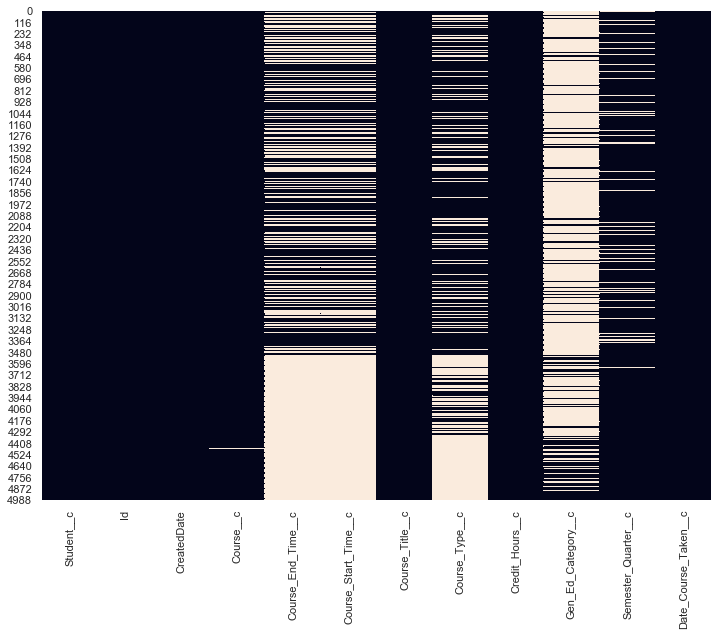

In [111]:
sns.set(rc={'figure.figsize':(12,9)}) # adjust figure size
sns.heatmap(courseSchedule.isnull(), cbar=False)

In [112]:
total = courseSchedule.isnull().sum().sort_values(ascending=False)
percent = (courseSchedule.isnull().sum()/courseSchedule.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total Missing', 'Percent'])
missing_data

,Total Missing,Percent
Gen_Ed_Category__c,3887,0.762007
Course_End_Time__c,2976,0.583415
Course_Start_Time__c,2974,0.583023
Course_Type__c,2035,0.398941
Semester_Quarter__c,441,0.086454
Course__c,11,0.002156
Course_Title__c,7,0.001372
Date_Course_Taken__c,0,0.000000
Credit_Hours__c,0,0.000000
CreatedDate,0,0.000000


In [113]:
# export 
# courseSchedule.to_csv('courseSchedule_new.csv')

## Table: enrollment

In [4]:
#read the csv document
enrollment = pd.read_csv('DP- Enrollment_c 5.10.21.csv')

In [115]:
enrollment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061 entries, 0 to 2060
Data columns (total 11 columns):
Student__c               2061 non-null object
Id                       2061 non-null object
CreatedDate              2061 non-null object
College__c               2061 non-null object
Date_Last_Verified__c    1925 non-null object
Degree_Type__c           1998 non-null object
End_Date__c              1520 non-null object
Major_Text__c            162 non-null object
Start_Date__c            2002 non-null object
Status__c                2059 non-null object
Withdrawal_code__c       634 non-null object
dtypes: object(11)
memory usage: 177.2+ KB


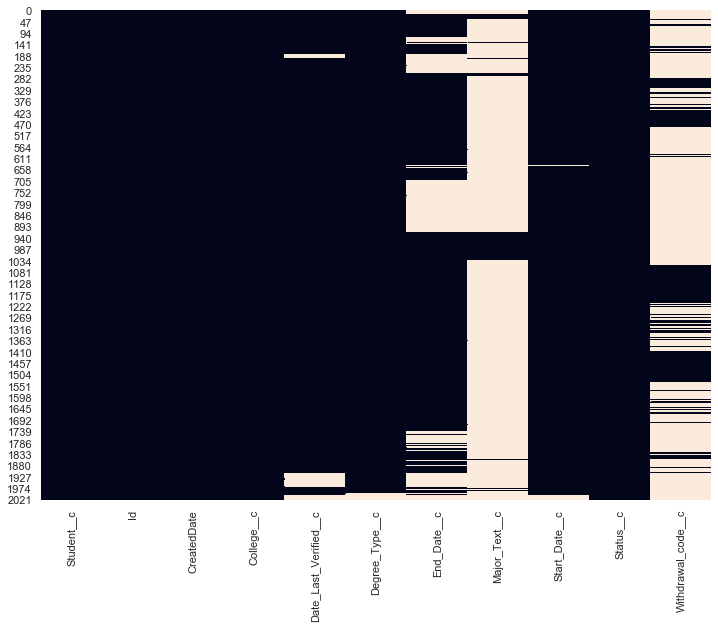

In [116]:
sns.heatmap(enrollment.isnull(), cbar=False)

In [119]:
total = enrollment.isnull().sum().sort_values(ascending=False)
percent = (enrollment.isnull().sum()/enrollment.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total Missing', 'Percent'])
missing_data

,Total Missing,Percent
Major_Text__c,1899,0.921397
Withdrawal_code__c,1427,0.692382
End_Date__c,541,0.262494
Date_Last_Verified__c,136,0.065987
Degree_Type__c,63,0.030568
Start_Date__c,59,0.028627
Status__c,2,0.000970
College__c,0,0.000000
CreatedDate,0,0.000000
Id,0,0.000000


### Some individual samples

#### student (00346000002iXZCAA2)

In [5]:
# this student has three records
# 8/27/2012 -- 12/19/2012, he was working on Bachelor's degree, but transferred due to Academic;Financial;Motivationa reasons
# 1/14/2013 -- 5/17/2013, he was working on an Associate's or Certificate (TBD), but wuthdrew due to Motivational reason
# 8/15/2013 -- 12/13/2013, he resumed his Bachelor's program but Withdrew due to family reason
enrollment[enrollment['Student__c'] == '00346000002iXZCAA2']

,Student__c,Id,CreatedDate,College__c,Date_Last_Verified__c,Degree_Type__c,End_Date__c,Major_Text__c,Start_Date__c,Status__c,Withdrawal_code__c
452,00346000002iXZCAA2,a0046000001Udw3AAC,3/15/2017 15:47,00146000004iTMiAAM,11/18/2019 0:00,Associate's or Certificate (TBD),5/17/2013 0:00,NaN,1/14/2013 0:00,Withdrew,Motivational
1119,00346000002iXZCAA2,a0046000001UecmAAC,3/15/2017 15:48,00146000004iTl3AAE,11/18/2019 0:00,Bachelor's,12/19/2012 0:00,NaN,8/27/2012 0:00,Transferred out,Academic;Financial;Motivational
1892,00346000002iXZCAA2,a0046000001UdCVAA0,3/15/2017 15:47,00146000004iTjcAAE,8/26/2014 0:00,Bachelor's,12/13/2013 0:00,NaN,8/15/2013 0:00,Withdrew,Family


#### student (00346000002iWONAA2)

In [121]:
# this student has one record
# 8/17/2015 -- 5/11/2019, he got his Bachelor's degree in four years!
enrollment[enrollment['Student__c'] == '00346000002iWONAA2']

,Student__c,Id,CreatedDate,College__c,Date_Last_Verified__c,Degree_Type__c,End_Date__c,Major_Text__c,Start_Date__c,Status__c,Withdrawal_code__c
1789,00346000002iWONAA2,a0046000001UcyrAAC,3/15/2017 15:46,00146000004iTk7AAE,6/11/2019 0:00,Bachelor's,5/11/2019 0:00,NaN,8/17/2015 0:00,Graduated,NaN


#### student (00346000002iXeyAAE)

In [122]:
# this student has three records
# 9/8/2015 -- 5/15/2020, he got his Bachelor's degree in five years!
# 5/8/2017 -- 8/27/2017, he took summer class (support program)
# 5/13/2019 -- 7/31/2019, he took summer class (support program)
enrollment[enrollment['Student__c'] == '00346000002iXeyAAE']

,Student__c,Id,CreatedDate,College__c,Date_Last_Verified__c,Degree_Type__c,End_Date__c,Major_Text__c,Start_Date__c,Status__c,Withdrawal_code__c
1049,00346000002iXeyAAE,a0046000001UenUAAS,3/15/2017 15:48,00146000004iTIWAA2,11/18/2019 0:00,Bachelor's,5/15/2020 0:00,NaN,9/8/2015 0:00,Graduated,NaN
1325,00346000002iXeyAAE,a0046000004IplGAAS,12/20/2017 23:53,00146000004iTP0AAM,11/18/2019 0:00,Bachelor's,8/27/2017 0:00,NaN,5/8/2017 0:00,Transferred out,Summer Academics
1418,00346000002iXeyAAE,a004p000007OdH4AAK,12/5/2019 23:05,00146000004iTP0AAM,11/18/2019 0:00,Bachelor's,7/31/2019 0:00,NaN,5/13/2019 0:00,Transferred out,Summer Academics


### College__c

In [123]:
# Although college__c has no NULLS, but since we only have college codes, rather than college names
# it is hard to be applied to analysis. 
# After meeting with UtmostU, we have another new table which contains the college info
# What we want to do is conbining these two tables
enrollment.head()

,Student__c,Id,CreatedDate,College__c,Date_Last_Verified__c,Degree_Type__c,End_Date__c,Major_Text__c,Start_Date__c,Status__c,Withdrawal_code__c
0,00346000002iXakAAE,a0046000003Bk42AAC,8/15/2017 15:16,00146000004iTNNAA2,12/19/2019 0:00,Associate's,NaN,NaN,8/21/2017 0:00,Attending,NaN
1,0034600000iXknRAAS,a004p000007OakbAAC,11/21/2019 20:29,00146000004iTl1AAE,11/21/2019 0:00,Associate's,8/6/2019 0:00,NaN,6/3/2019 0:00,Withdrew,Summer Academics
2,0034600000iXknDAAS,a0046000002cWOrAAM,6/26/2017 14:21,00146000004iTjvAAE,11/18/2019 0:00,Associate's,NaN,NaN,8/28/2017 0:00,Attending,NaN
3,0034600000iXknZAAS,a0046000002cWPNAA2,6/26/2017 14:21,00146000004iSo7AAE,11/18/2019 0:00,Associate's,NaN,NaN,8/21/2017 0:00,Attending,NaN
4,0034600000iXkmXAAS,a0046000002cWPWAA2,6/26/2017 14:21,00146000004iTksAAE,11/18/2019 0:00,Associate's,NaN,NaN,8/15/2017 0:00,Attending,NaN


In [124]:
#read the csv document
college = pd.read_csv('DP-College List w. SF ID.csv')

In [125]:
college.head()

,College: Account Name,College: Account ID
0,City Colleges of Chicago-Harold Washington Col...,00146000004iTju
1,University of Miami,00146000004iTRQ
2,Chicago State University,00146000004iTkK
3,Moraine Valley Community College,00146000004iTMn
4,Illinois Central College,00146000004iTNN


In [126]:
# there are 2063 entries
college.info

<bound method DataFrame.info of                                   College: Account Name College: Account ID
0     City Colleges of Chicago-Harold Washington Col...     00146000004iTju
1                                   University of Miami     00146000004iTRQ
2                              Chicago State University     00146000004iTkK
3                      Moraine Valley Community College     00146000004iTMn
4                              Illinois Central College     00146000004iTNN
...                                                 ...                 ...
2058                  Southern New Hampshire University     00146000004iTUh
2059      City Colleges of Chicago-Kennedy-King College     00146000004iTl1
2060                  Southern New Hampshire University     00146000004iTUh
2061                   University of Michigan-Ann Arbor     00146000004iTIW
2062                           Chicago State University     00146000004iTkK

[2063 rows x 2 columns]>

In [127]:
# rename the columns
college.rename(columns={"College: Account Name": "College_name", "College: Account ID": "College_ID"}, inplace=True)

In [128]:
college['College_name'].nunique()

245

In [129]:
college['College_ID'].nunique()

246

In [130]:
# we found that there are 256 unique college names, but 256 unique college codes
# we tried to find the error
df = college.groupby(['College_name']).agg(['nunique'])

In [131]:
df[df[('College_ID', 'nunique')] > 1]

,College_ID
,nunique
College_name,
Northwestern College,2


In [132]:
college[college['College_name'] == 'Northwestern College']

,College_name,College_ID
1396,Northwestern College,00146000004iTPP
1898,Northwestern College,00146000004iTMk


In [133]:
college[college['College_ID'] == '00146000004iTPP']

,College_name,College_ID
1396,Northwestern College,00146000004iTPP


In [134]:
college[college['College_ID'] == '00146000004iTMk']

,College_name,College_ID
1898,Northwestern College,00146000004iTMk


In [135]:
# conclusion: Northwestern College has two different college codes. 

In [136]:
college['College_ID'].head(10)

0    00146000004iTju
1    00146000004iTRQ
2    00146000004iTkK
3    00146000004iTMn
4    00146000004iTNN
5    00146000004iTbW
6    00146000004iTju
7    00146000004iTju
8    00146000004iTjV
9    00146000004iTks
Name: College_ID, dtype: object

In [137]:
enrollment['College__c'].head(10)

0    00146000004iTNNAA2
1    00146000004iTl1AAE
2    00146000004iTjvAAE
3    00146000004iSo7AAE
4    00146000004iTksAAE
5    00146000004iTjuAAE
6    00146000004iTl1AAE
7    00146000004iTMiAAM
8    00146000004iTl1AAE
9    00146000004iTl1AAE
Name: College__c, dtype: object

In [138]:
# conclusion
# the college codes in "college" table are different from codes in "enrollment" table
# can't join...

### Status__c

In [6]:
# we found there are only two NULLs in "Status" Col
enrollment['Status__c'].value_counts(dropna=False)

Withdrew               669
Transferred out        558
Attending              530
Graduated              233
Did not matriculate     67
Matriculating            2
NaN                      2
Name: Status__c, dtype: int64

In [12]:
# we tried to find the student ID for thiese two entries
stduents = enrollment.loc[enrollment['Status__c'].isnull()].drop(['College__c', 'Degree_Type__c', 'Major_Text__c'], axis=1)
stduents

,Student__c,Id,CreatedDate,Date_Last_Verified__c,End_Date__c,Start_Date__c,Status__c,Withdrawal_code__c
2059,0034600001a2rGOAAY,a0046000007LfB6AAK,6/24/2019 17:43,NaN,NaN,8/19/2019 0:00,NaN,NaN
2060,0034p00001f3nkcAAA,a004p000007PAARAA4,6/24/2020 15:39,NaN,NaN,NaN,NaN,NaN


In [9]:
# Let's see if these two students have other records in this enrollment table
student1 = enrollment.loc[enrollment['Student__c'] == '0034600001a2rGOAAY'].drop(['College__c', 'Degree_Type__c', 'Major_Text__c'], axis=1)
student1

,Student__c,Id,CreatedDate,Date_Last_Verified__c,End_Date__c,Start_Date__c,Status__c,Withdrawal_code__c
2059,0034600001a2rGOAAY,a0046000007LfB6AAK,6/24/2019 17:43,NaN,NaN,8/19/2019 0:00,NaN,NaN


In [10]:
# replce the NULL with attending for student (0034p00001f3nkcAA)
student2 = enrollment.loc[enrollment['Student__c'] == '0034p00001f3nkcAAA'].drop(['College__c', 'Degree_Type__c', 'Major_Text__c'], axis=1)
student2

,Student__c,Id,CreatedDate,Date_Last_Verified__c,End_Date__c,Start_Date__c,Status__c,Withdrawal_code__c
1968,0034p00001f3nkcAAA,a004p000008DS0cAAG,7/17/2020 18:06,NaN,NaN,NaN,Attending,NaN
1969,0034p00001f3nkcAAA,a004p000008DS1GAAW,7/17/2020 18:13,NaN,NaN,8/24/2020 0:00,Attending,NaN
2060,0034p00001f3nkcAAA,a004p000007PAARAA4,6/24/2020 15:39,NaN,NaN,NaN,NaN,NaN


In [143]:
#read the csv document
contact = pd.read_csv('DP- Contact Object 5.10.21.csv')

In [144]:
# find the other student (0034600001a2rGOAAY) in contact table, it shows she is enrolled 
contact.loc[contact['Id'] == '0034600001a2rGOAAY']
# contact.loc[contact['Id'] == '0034600001a2rGOAAY']['Stage__c']

,Id,Birthdate,Actual_College_Graduation_Date__c,College_Credits_Accumulated__c,College_Graduated_From__c,College_Major__c,College_Minor__c,Cumulative_College_GPA__c,Total_Credits_Required_to_Graduate__c,Pell_Eligible__c,...,Semester_7_Credits__c,Semester_8_Credits__c,Semester_9_Credits__c,Career_Path__c,College_Path__c,High_School_Graduated_From__c,PAC_Mentee__c,Stage__c,Career_Cluster_Matches__c,Active_T_Mobile_Plan__c
997,0034600001a2rGOAAY,12/30/2000 0:00,NaN,25.0,NaN,NaN,NaN,2.12,120.0,0,...,NaN,NaN,NaN,0,1,NaN,2019-2020,5.\tEnrolled,NaN,1.0


In [145]:
# therefore, replace these two NULLs with 'attending'
#fill in the null
enrollment = enrollment.set_value(2059, 'Status__c', 'Attending')
enrollment = enrollment.set_value(2060, 'Status__c', 'Attending')

In [146]:
# check
enrollment['Status__c'].value_counts(dropna=False)

Withdrew               669
Transferred out        558
Attending              532
Graduated              233
Did not matriculate     67
Matriculating            2
Name: Status__c, dtype: int64

### Start_Date__c / End_Date__c

In [147]:
# as we can see, for those students who have start date but no end date, 
# they are not necesasrily students who are attening (enrolled), 
# some have withdrawn or graduated or other status
enrollment.loc[((enrollment['End_Date__c'].isnull()) 
               & (enrollment['Start_Date__c'].notnull())
               & (enrollment['Status__c'] != 'Attending'))]

,Student__c,Id,CreatedDate,College__c,Date_Last_Verified__c,Degree_Type__c,End_Date__c,Major_Text__c,Start_Date__c,Status__c,Withdrawal_code__c
690,00346000002iXbcAAE,a0046000001UerAAAS,3/15/2017 15:48,00146000004iTkgAAE,5/18/2020 0:00,Bachelor's,NaN,NaN,8/31/2015 0:00,Graduated,NaN
691,00346000002iXf7AAE,a004p000007OdHDAA0,12/5/2019 23:05,00146000004iTY3AAM,4/29/2020 0:00,Bachelor's,NaN,NaN,7/1/2019 0:00,Withdrew,NaN
1801,0034600000iXknJAAS,a0046000006EzAEAA0,12/5/2018 4:46,00146000004iTYlAAM,11/19/2018 0:00,Bachelor's,NaN,NaN,8/29/2018 0:00,Withdrew,NaN
1848,00346000002iXcSAAU,a0046000001UdQwAAK,3/15/2017 15:47,00146000004iTl0AAE,6/15/2016 0:00,Bachelor's,NaN,NaN,8/15/2016 0:00,Withdrew,NaN
1860,00346000002iXXHAA2,a0046000001UczfAAC,3/15/2017 15:46,00146000004iTjyAAE,8/23/2015 0:00,Bachelor's,NaN,NaN,9/30/2013 0:00,Transferred out,Unknown
1861,00346000002iWOrAAM,a0046000001UbckAAC,3/15/2017 15:45,00146000004iTkKAAU,8/20/2015 0:00,Bachelor's,NaN,NaN,8/24/2015 0:00,Withdrew,NaN
1905,00346000002iXXKAA2,a0046000001UeJbAAK,3/15/2017 15:48,00146000004iTl4AAE,9/5/2013 0:00,Bachelor's,NaN,NaN,8/15/2013 0:00,Withdrew,Health
1906,00346000002iXdJAAU,a0046000001UdPJAA0,3/15/2017 15:47,00146000004iTIGAA2,9/5/2013 0:00,Bachelor's,NaN,NaN,8/15/2013 0:00,Withdrew,Family;Health;Motivational;Social
1980,0034600001EXcTMAA1,a0046000006Ez59AAC,12/5/2018 3:49,00146000004iSS8AAM,6/14/2018 0:00,Employment,NaN,NaN,8/15/2018 0:00,Matriculating,NaN
1981,0034600001EXcSyAAL,a0046000006Ez6iAAC,12/5/2018 3:50,00146000004iSReAAM,6/14/2018 0:00,Employment,NaN,NaN,8/15/2018 0:00,Matriculating,NaN


### Degree_Type__c

In [148]:
enrollment['Degree_Type__c'].value_counts(dropna=False)

Bachelor's                          1290
Associate's or Certificate (TBD)     484
Associate's                          199
NaN                                   63
Master's                               8
Certificate                            7
Trade/Vocational                       7
Employment                             3
Name: Degree_Type__c, dtype: int64

In [149]:
def getRows(student):
    row = enrollment.loc[enrollment['Student__c'] == student].shape[0]
    if row == 1: pass
    else: return f'student {student} has {row} record'

In [150]:
df = enrollment.loc[enrollment['Degree_Type__c'].isnull()]

In [151]:
# find student who has more than one records, but has null in degree type col

# pd.set_option('display.max_rows', None)
df['Student__c'].apply(lambda x: getRows(x)).to_frame()

,Student__c
1998,student 0034600000lBxVGAA0 has 3 record
1999,student 0034600000iXknKAAS has 3 record
2000,student 00346000002iXbaAAE has 4 record
2001,student 00346000002iXeTAAU has 6 record
2002,None
...,...
2056,None
2057,None
2058,None
2059,None


In [152]:
# we tried to find if there will be any patterns shown below to fill in the NULLs, but we didn't

In [153]:
enrollment[enrollment['Student__c'] == '0034600000lBxVGAA0']

,Student__c,Id,CreatedDate,College__c,Date_Last_Verified__c,Degree_Type__c,End_Date__c,Major_Text__c,Start_Date__c,Status__c,Withdrawal_code__c
684,0034600000lBxVGAA0,a004600000535GEAAY,8/29/2018 14:29,00146000004iTjVAAU,1/28/2021 0:00,Bachelor's,7/1/2020 0:00,NaN,8/27/2018 0:00,Transferred out,NaN
1817,0034600000lBxVGAA0,a0046000003B7kfAAC,9/8/2017 18:52,00146000004iTkLAAU,1/29/2018 0:00,Bachelor's,5/1/2018 0:00,NaN,9/8/2017 0:00,Transferred out,NaN
1998,0034600000lBxVGAA0,a004p000008FD6iAAG,1/28/2021 22:28,00146000004iTkKAAU,1/28/2021 0:00,NaN,NaN,NaN,9/1/2020 0:00,Attending,NaN


In [154]:
enrollment[enrollment['Student__c'] == '0034600000iXknKAAS']

,Student__c,Id,CreatedDate,College__c,Date_Last_Verified__c,Degree_Type__c,End_Date__c,Major_Text__c,Start_Date__c,Status__c,Withdrawal_code__c
372,0034600000iXknKAAS,a0046000006Ez8yAAC,12/5/2018 4:46,00146000004iTl1AAE,11/18/2019 0:00,Associate's or Certificate (TBD),7/28/2018 0:00,NaN,6/6/2018 0:00,Transferred out,Summer Academics
685,0034600000iXknKAAS,a0046000004IpjRAAS,12/20/2017 23:53,00146000004iTjcAAE,11/11/2020 0:00,Bachelor's,NaN,NaN,8/21/2017 0:00,Attending,NaN
1999,0034600000iXknKAAS,a004p000007OdGzAAK,12/5/2019 23:05,00146000004iTl1AAE,11/11/2020 0:00,NaN,8/7/2019 0:00,NaN,6/5/2019 0:00,Attending,NaN


In [155]:
enrollment[enrollment['Student__c'] == '00346000002iXbaAAE']

,Student__c,Id,CreatedDate,College__c,Date_Last_Verified__c,Degree_Type__c,End_Date__c,Major_Text__c,Start_Date__c,Status__c,Withdrawal_code__c
548,00346000002iXbaAAE,a0046000004IpjjAAC,12/20/2017 23:53,00146000004iTl1AAE,11/18/2019 0:00,Associate's or Certificate (TBD),5/12/2018 0:00,NaN,8/28/2017 0:00,Withdrew,NaN
1467,00346000002iXbaAAE,a0046000001UesLAAS,3/15/2017 15:48,00146000004iTk0AAE,11/18/2019 0:00,Bachelor's,5/15/2016 0:00,NaN,1/19/2016 0:00,Withdrew,Academic
1478,00346000002iXbaAAE,a0046000001UerhAAC,3/15/2017 15:48,00146000004iTk0AAE,11/18/2019 0:00,Bachelor's,12/21/2014 0:00,NaN,9/4/2012 0:00,Withdrew,Academic;Financial
2000,00346000002iXbaAAE,a004p000007Of1KAAS,12/19/2019 18:21,00146000004iTUhAAM,11/20/2019 0:00,NaN,NaN,NaN,10/28/2019 0:00,Attending,NaN


In [156]:
enrollment[enrollment['Student__c'] == '00346000002iXeTAAU']

,Student__c,Id,CreatedDate,College__c,Date_Last_Verified__c,Degree_Type__c,End_Date__c,Major_Text__c,Start_Date__c,Status__c,Withdrawal_code__c
298,00346000002iXeTAAU,a0046000001Uc8KAAS,3/15/2017 15:46,00146000004iTl1AAE,11/18/2019 0:00,Associate's or Certificate (TBD),5/11/2014 0:00,NaN,8/26/2013 0:00,Transferred out,Academic
637,00346000002iXeTAAU,a004p000007OdGZAA0,12/5/2019 23:05,00146000004iTjuAAE,11/18/2019 0:00,Associate's or Certificate (TBD),11/13/2018 0:00,NaN,1/16/2018 0:00,Withdrew,NaN
1137,00346000002iXeTAAU,a0046000001UczSAAS,3/15/2017 15:46,00146000004iTJ7AAM,11/18/2019 0:00,Bachelor's,5/21/2013 0:00,NaN,9/5/2012 0:00,Transferred out,Academic;Financial
1429,00346000002iXeTAAU,a0046000001UczbAAC,3/15/2017 15:46,00146000004iTJ7AAM,11/18/2019 0:00,Bachelor's,12/18/2014 0:00,NaN,9/3/2014 0:00,Withdrew,Academic;Financial
1521,00346000002iXeTAAU,a0046000001UetQAAS,3/15/2017 15:48,00146000004iTP0AAM,11/18/2019 0:00,Bachelor's,8/23/2015 0:00,NaN,5/4/2015 0:00,Withdrew,Summer Academics
2001,00346000002iXeTAAU,a004p000007Of1UAAS,12/19/2019 18:23,00146000004iTUhAAM,11/20/2019 0:00,NaN,NaN,NaN,10/28/2019 0:00,Attending,NaN


In [157]:
enrollment[enrollment['Student__c'] == '0034p00001jVVbuAAG']

,Student__c,Id,CreatedDate,College__c,Date_Last_Verified__c,Degree_Type__c,End_Date__c,Major_Text__c,Start_Date__c,Status__c,Withdrawal_code__c
2004,0034p00001jVVbuAAG,a004p000008FoUTAA0,2/23/2021 18:26,0014p00001j9YiiAAE,NaN,NaN,NaN,NaN,NaN,Attending,NaN
2032,0034p00001jVVbuAAG,a004p000008FpzyAAC,2/24/2021 17:09,0014p00001j9YiiAAE,NaN,NaN,NaN,NaN,NaN,Attending,NaN


In [158]:
enrollment[enrollment['Student__c'] == '0034p00001jVVbuAAG']

,Student__c,Id,CreatedDate,College__c,Date_Last_Verified__c,Degree_Type__c,End_Date__c,Major_Text__c,Start_Date__c,Status__c,Withdrawal_code__c
2004,0034p00001jVVbuAAG,a004p000008FoUTAA0,2/23/2021 18:26,0014p00001j9YiiAAE,NaN,NaN,NaN,NaN,NaN,Attending,NaN
2032,0034p00001jVVbuAAG,a004p000008FpzyAAC,2/24/2021 17:09,0014p00001j9YiiAAE,NaN,NaN,NaN,NaN,NaN,Attending,NaN


In [159]:
enrollment[enrollment['Student__c'] == '0034p00001f3nkcAAA']

,Student__c,Id,CreatedDate,College__c,Date_Last_Verified__c,Degree_Type__c,End_Date__c,Major_Text__c,Start_Date__c,Status__c,Withdrawal_code__c
1968,0034p00001f3nkcAAA,a004p000008DS0cAAG,7/17/2020 18:06,00146000004iTIHAA2,NaN,Bachelor's,NaN,NaN,NaN,Attending,NaN
1969,0034p00001f3nkcAAA,a004p000008DS1GAAW,7/17/2020 18:13,00146000004iTIHAA2,NaN,Bachelor's,NaN,NaN,8/24/2020 0:00,Attending,NaN
2060,0034p00001f3nkcAAA,a004p000007PAARAA4,6/24/2020 15:39,00146000004iTIHAA2,NaN,NaN,NaN,NaN,NaN,Attending,NaN


### Major_Text__c

In [160]:
# calculation
# replace variables
enrollment.loc[(enrollment['Withdrawal_code__c'].isnull()) 
               & (enrollment['Status__c'] == 'Matriculating')].count()

Student__c               2
Id                       2
CreatedDate              2
College__c               2
Date_Last_Verified__c    2
Degree_Type__c           2
End_Date__c              0
Major_Text__c            0
Start_Date__c            2
Status__c                2
Withdrawal_code__c       0
dtype: int64

In [161]:
# what we know is that 
# in the "contact object" table, "major" column is a major the student planed to study
# in the "enrollment" table, "major" column is a major the student studied
# therefore, we combine these two tables and try to find any insights

In [162]:
contact.head()

,Id,Birthdate,Actual_College_Graduation_Date__c,College_Credits_Accumulated__c,College_Graduated_From__c,College_Major__c,College_Minor__c,Cumulative_College_GPA__c,Total_Credits_Required_to_Graduate__c,Pell_Eligible__c,...,Semester_7_Credits__c,Semester_8_Credits__c,Semester_9_Credits__c,Career_Path__c,College_Path__c,High_School_Graduated_From__c,PAC_Mentee__c,Stage__c,Career_Cluster_Matches__c,Active_T_Mobile_Plan__c
0,00346000002iXekAAE,5/2/1996 0:00,6/1/2017 0:00,48.0,Year up,Computer Science,NaN,2.29,120.0,0,...,NaN,NaN,NaN,0,1,NaN,NaN,8. Graduate of Program,NaN,1.0
1,00346000002iXcbAAE,1/23/1995 0:00,10/4/2019 0:00,6.0,Year UP,NaN,NaN,1.10,120.0,0,...,NaN,NaN,NaN,1,0,NaN,NaN,8. Graduate of Program,NaN,0.0
2,00346000002iXbiAAE,11/19/1996 0:00,9/11/2018 0:00,39.0,Year UP,Communications,NaN,1.92,120.0,0,...,NaN,NaN,NaN,1,0,NaN,NaN,8. Graduate of Program,NaN,0.0
3,00346000002iXaSAAU,3/20/1995 0:00,5/18/2018 0:00,108.0,Western Illinois University; Western Illinois ...,"Recreation, Park and Tourism Administration",Scuba,3.51,120.0,0,...,NaN,NaN,NaN,0,1,NaN,NaN,8. Graduate of Program,Human Services;Business Management & Administr...,1.0
4,00346000002iXaWAAU,8/5/1996 0:00,5/11/2019 0:00,124.0,Western Illinois University,Broadcasting,NaN,2.51,120.0,0,...,NaN,NaN,15.0,0,1,NaN,NaN,8. Graduate of Program,Education;Business Management & Administration...,0.0


In [163]:
enrollment.head()

,Student__c,Id,CreatedDate,College__c,Date_Last_Verified__c,Degree_Type__c,End_Date__c,Major_Text__c,Start_Date__c,Status__c,Withdrawal_code__c
0,00346000002iXakAAE,a0046000003Bk42AAC,8/15/2017 15:16,00146000004iTNNAA2,12/19/2019 0:00,Associate's,NaN,NaN,8/21/2017 0:00,Attending,NaN
1,0034600000iXknRAAS,a004p000007OakbAAC,11/21/2019 20:29,00146000004iTl1AAE,11/21/2019 0:00,Associate's,8/6/2019 0:00,NaN,6/3/2019 0:00,Withdrew,Summer Academics
2,0034600000iXknDAAS,a0046000002cWOrAAM,6/26/2017 14:21,00146000004iTjvAAE,11/18/2019 0:00,Associate's,NaN,NaN,8/28/2017 0:00,Attending,NaN
3,0034600000iXknZAAS,a0046000002cWPNAA2,6/26/2017 14:21,00146000004iSo7AAE,11/18/2019 0:00,Associate's,NaN,NaN,8/21/2017 0:00,Attending,NaN
4,0034600000iXkmXAAS,a0046000002cWPWAA2,6/26/2017 14:21,00146000004iTksAAE,11/18/2019 0:00,Associate's,NaN,NaN,8/15/2017 0:00,Attending,NaN


In [164]:
# create a new dataframe in which Major_Text__c column is not NULL
df = enrollment[enrollment['Major_Text__c'].notnull()]
df.head()

,Student__c,Id,CreatedDate,College__c,Date_Last_Verified__c,Degree_Type__c,End_Date__c,Major_Text__c,Start_Date__c,Status__c,Withdrawal_code__c
17,00346000002iWAkAAM,a0046000001UbWjAAK,3/15/2017 15:45,00146000004iTjpAAE,11/18/2019 0:00,Associate's,12/23/2017 0:00,ARRUPE COLLEGE-LIBERAL ARTS,1/19/2016 0:00,Graduated,NaN
18,0034600000iXknHAAS,a0046000004IpjkAAC,12/20/2017 23:53,00146000004iTjpAAE,11/18/2019 0:00,Associate's,8/10/2019 0:00,ARRUPE COLLEGE-LIBERAL ARTS,8/28/2017 0:00,Graduated,NaN
19,00346000002iXcPAAU,a0046000001UbXGAA0,3/15/2017 15:45,00146000004iTjpAAE,11/18/2019 0:00,Associate's,8/11/2018 0:00,ARRUPE COLLEGE-SOCIAL AND BEHAVIORAL SCIENCES,8/29/2016 0:00,Graduated,NaN
20,00346000002iXZtAAM,a0046000006EzBVAA0,12/5/2018 4:46,00146000004iTQ3AAM,11/18/2019 0:00,Associate's,8/4/2017 0:00,ARTS & SCIENCES,8/26/2015 0:00,Graduated,NaN
21,00346000002iXbCAAU,a0046000001Uc2KAAS,3/15/2017 15:46,00146000004iTjuAAE,11/18/2019 0:00,Associate's,12/16/2017 0:00,ASSOCIATE IN ARTS-AA,8/29/2016 0:00,Graduated,NaN


In [165]:
df.shape

(162, 11)

In [166]:
df['Student__c'].nunique()

149

In [167]:
df1 = df.groupby(['Student__c']).agg(['nunique'])

In [168]:
# students whose major column is not null and who have more than one records
df1[df1[('Major_Text__c', 'nunique')] > 1]

,Id,CreatedDate,College__c,Date_Last_Verified__c,Degree_Type__c,End_Date__c,Major_Text__c,Start_Date__c,Status__c,Withdrawal_code__c
,nunique,nunique,nunique,nunique,nunique,nunique,nunique,nunique,nunique,nunique
Student__c,,,,,,,,,,
00346000002iXWuAAM,2,2,2,1,2,2,2,2,1,0
00346000002iXXWAA2,2,2,2,1,2,2,2,2,1,0
00346000002iXZFAA2,2,2,2,1,2,2,2,2,1,0
00346000002iXZZAA2,2,2,1,1,1,2,2,2,1,0
00346000002iXZcAAM,2,2,2,1,2,2,2,2,1,1
00346000002iXZtAAM,2,2,1,1,2,2,2,2,1,0
00346000002iXaOAAU,2,2,1,1,2,2,2,2,1,0
00346000002iXbQAAU,2,2,2,1,2,2,2,2,1,0


In [169]:
# check
enrollment[enrollment['Student__c'] == '00346000002iXZtAAM']

,Student__c,Id,CreatedDate,College__c,Date_Last_Verified__c,Degree_Type__c,End_Date__c,Major_Text__c,Start_Date__c,Status__c,Withdrawal_code__c
20,00346000002iXZtAAM,a0046000006EzBVAA0,12/5/2018 4:46,00146000004iTQ3AAM,11/18/2019 0:00,Associate's,8/4/2017 0:00,ARTS & SCIENCES,8/26/2015 0:00,Graduated,NaN
1003,00346000002iXZtAAM,a0046000004IpkoAAC,12/20/2017 23:53,00146000004iTQ3AAM,11/18/2019 0:00,Bachelor's,5/13/2019 0:00,PSYCHOLOGY BA,8/23/2017 0:00,Graduated,NaN


In [170]:
# join tables

In [171]:
# enrollment table --> left
enrollment_left = df[['Student__c', 'Id', 'Degree_Type__c','End_Date__c', 'Status__c', 'Major_Text__c']]

In [172]:
# contact table --> right
contact_right = contact[['Id', 'College_Major__c']]

In [173]:
# rename column for further join
contact_right.rename(columns = {"Id": "Student__c"}, inplace=True) 

In [174]:
result = pd.merge(enrollment_left, contact_right, how="left", on=["Student__c"])

In [175]:
result.rename(columns = {"Major_Text__c": "Major_graduated", "College_Major__c": "Major_declared"}, inplace=True) 

In [176]:
# lowercase
result['Major_graduated'] = result['Major_graduated'].apply(lambda x: x.title())

In [177]:
result.head()

,Student__c,Id,Degree_Type__c,End_Date__c,Status__c,Major_graduated,Major_declared
0,00346000002iWAkAAM,a0046000001UbWjAAK,Associate's,12/23/2017 0:00,Graduated,Arrupe College-Liberal Arts,Behavioral science and humanities
1,0034600000iXknHAAS,a0046000004IpjkAAC,Associate's,8/10/2019 0:00,Graduated,Arrupe College-Liberal Arts,Computer Engineering
2,00346000002iXcPAAU,a0046000001UbXGAA0,Associate's,8/11/2018 0:00,Graduated,Arrupe College-Social And Behavioral Sciences,Business or Nursing
3,00346000002iXZtAAM,a0046000006EzBVAA0,Associate's,8/4/2017 0:00,Graduated,Arts & Sciences,Psychology
4,00346000002iXbCAAU,a0046000001Uc2KAAS,Associate's,12/16/2017 0:00,Graduated,Associate In Arts-Aa,General Studies


In [178]:
# check
result.shape

(162, 7)

In [179]:
result['Student__c'].nunique()

149

In [180]:
result.to_csv('majors.csv') # those are students who have a planned major and also graduated successfully with a major

In [181]:
enrollment.head()

,Student__c,Id,CreatedDate,College__c,Date_Last_Verified__c,Degree_Type__c,End_Date__c,Major_Text__c,Start_Date__c,Status__c,Withdrawal_code__c
0,00346000002iXakAAE,a0046000003Bk42AAC,8/15/2017 15:16,00146000004iTNNAA2,12/19/2019 0:00,Associate's,NaN,NaN,8/21/2017 0:00,Attending,NaN
1,0034600000iXknRAAS,a004p000007OakbAAC,11/21/2019 20:29,00146000004iTl1AAE,11/21/2019 0:00,Associate's,8/6/2019 0:00,NaN,6/3/2019 0:00,Withdrew,Summer Academics
2,0034600000iXknDAAS,a0046000002cWOrAAM,6/26/2017 14:21,00146000004iTjvAAE,11/18/2019 0:00,Associate's,NaN,NaN,8/28/2017 0:00,Attending,NaN
3,0034600000iXknZAAS,a0046000002cWPNAA2,6/26/2017 14:21,00146000004iSo7AAE,11/18/2019 0:00,Associate's,NaN,NaN,8/21/2017 0:00,Attending,NaN
4,0034600000iXkmXAAS,a0046000002cWPWAA2,6/26/2017 14:21,00146000004iTksAAE,11/18/2019 0:00,Associate's,NaN,NaN,8/15/2017 0:00,Attending,NaN


In [182]:
enrollment_graduated = enrollment[enrollment['Status__c'] == 'Graduated']

In [183]:
enrollment_graduated.shape

(233, 11)

In [184]:
enrollment_graduated['Student__c'].nunique()

209

In [185]:
result3 = pd.merge(contact, enrollment_graduated, how="left", left_on='Id', right_on='Student__c')

In [186]:
result3.columns

Index(['Id_x', 'Birthdate', 'Actual_College_Graduation_Date__c',
       'College_Credits_Accumulated__c', 'College_Graduated_From__c',
       'College_Major__c', 'College_Minor__c', 'Cumulative_College_GPA__c',
       'Total_Credits_Required_to_Graduate__c', 'Pell_Eligible__c',
       'Latest_Transcript__c', 'Latest_FAFSA_Date__c',
       'Last_Successful_Contact__c', 'Last_Outreach__c', 'HS_Final_GPA__c',
       'HS_Class__c', 'Highest_ACT_Score__c', 'Currently_Enrolled_At__c',
       'Ethnicity__c', 'First_Generation_College_Student__c', 'Gender__c',
       'EFC_from_FAFSA__c', 'Semester_1_GPA__c', 'Semester_2_GPA__c',
       'Semester_3_GPA__c', 'Semester_4_GPA__c', 'Semester_5_GPA__c',
       'Semester_6_GPA__c', 'Semester_7_GPA__c', 'Semester_8_GPA__c',
       'Semester_9_GPA__c', 'Proposed_College_Major__c',
       'Semester_10_Credits__c', 'Semester_11_Credits__c',
       'Semester_12_Credits__c', 'Semester_1_Credits__c',
       'Semester_2_Credits__c', 'Semester_3_Credits__c',


In [187]:
result3 = result3[['Id_x', 'College_Major__c', 'Major_Text__c', 'Status__c']]

In [188]:
result3.to_csv('majors1.csv') 

In [189]:
enrollment['Student__c'].nunique()

1142

In [190]:
enrollment[enrollment['Student__c'] == '00346000002iW9lAAE']

,Student__c,Id,CreatedDate,College__c,Date_Last_Verified__c,Degree_Type__c,End_Date__c,Major_Text__c,Start_Date__c,Status__c,Withdrawal_code__c
916,00346000002iW9lAAE,a004p000007TAZUAA4,9/29/2019 19:35,00146000004iTk7AAE,11/18/2019 0:00,Bachelor's,NaN,NaN,8/19/2019 0:00,Attending,NaN
1506,00346000002iW9lAAE,a0046000001UcwjAAC,3/15/2017 15:46,00146000004iTk7AAE,11/18/2019 0:00,Bachelor's,5/6/2016 0:00,NaN,8/14/2013 0:00,Withdrew,Financial
1653,00346000002iW9lAAE,a0046000004IpkcAAC,12/20/2017 23:53,00146000004iTk7AAE,11/18/2019 0:00,Bachelor's,12/17/2018 0:00,NaN,8/21/2017 0:00,Withdrew,NaN


In [191]:
enrollment[enrollment['Student__c'] == '0034p00001jVEU8AAO']

,Student__c,Id,CreatedDate,College__c,Date_Last_Verified__c,Degree_Type__c,End_Date__c,Major_Text__c,Start_Date__c,Status__c,Withdrawal_code__c
2035,0034p00001jVEU8AAO,a004p000008Fq01AAC,2/24/2021 17:09,0014p00001j9YiiAAE,NaN,NaN,NaN,NaN,NaN,Attending,NaN


In [192]:
pd.set_option('display.max_columns', None)

In [193]:
enrollment.groupby(['Student__c', 'Status__c', 'College__c'])['Id'].agg(['count']).reset_index(level='Student__c').head(20)

Student__c  count
Status__c       College__c                                   
Attending       00146000004iTk7AAE  00346000002iW9lAAE      1
Withdrew        00146000004iTk7AAE  00346000002iW9lAAE      2
Transferred out 00146000004iTZoAAM  00346000002iW9mAAE      1
                00146000004iTl1AAE  00346000002iW9mAAE      1
Graduated       00146000004iTl3AAE  00346000002iW9nAAE      1
Transferred out 00146000004iTLxAAM  00346000002iW9nAAE      2
                00146000004iTMjAAM  00346000002iW9nAAE      1
Attending       00146000004iTlCAAU  00346000002iW9oAAE      1
Graduated       00146000004iSzKAAU  00346000002iW9oAAE      1
Withdrew        00146000004iTl4AAE  00346000002iW9oAAE      1
Graduated       00146000004iTk7AAE  00346000002iW9pAAE      1
Transferred out 00146000004iTNDAA2  00346000002iW9pAAE      1
                00146000004iTjuAAE  00346000002iW9pAAE      1
                00146000004iTk7AAE  00346000002iW9pAAE      1
Graduated       00146000004iTl3AAE  00346000002iW9qAAE      1
                00146000004iTXXAA2  00346000002iW9rAAE      1
Transferred out 00146000004iTP0AAM  00346000002iW9sAAE      1
                00146000004iTkzAAE  00346000002iW9sAAE      1
Withdrew        00146000004iTAeAAM  00346000002iW9sAAE      1
Transferred out 00146000004iSZtAAM  00346000002iW9tAAE      1

In [194]:
result = pd.merge(enrollment_left, contact_right, how="left", on=["Student__c"])

### Date_Last_Verified__c

In [195]:
enrollment['Date_Last_Verified__c'].value_counts(dropna=False)

11/18/2019 0:00    1592
NaN                 136
8/16/2019 0:00       43
8/19/2019 0:00       18
6/18/2015 0:00       14
                   ... 
8/26/2018 0:00        1
3/17/2016 0:00        1
9/23/2015 0:00        1
6/4/2015 0:00         1
11/21/2019 0:00       1
Name: Date_Last_Verified__c, Length: 137, dtype: int64

In [196]:
total = enrollment.isnull().sum().sort_values(ascending=False)
percent = (enrollment.isnull().sum()/enrollment.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total Missing', 'Percent'])
missing_data

,Total Missing,Percent
Major_Text__c,1899,0.921397
Withdrawal_code__c,1427,0.692382
End_Date__c,541,0.262494
Date_Last_Verified__c,136,0.065987
Degree_Type__c,63,0.030568
Start_Date__c,59,0.028627
Status__c,0,0.000000
College__c,0,0.000000
CreatedDate,0,0.000000
Id,0,0.000000


In [197]:
# export file
# enrollment.to_csv('enrollment_new.csv')